In [903]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing important libraries

In [1039]:
import numpy as np
import pandas as pd
import seaborn as sns 

# Reading the dataset


In [1040]:
kidni_data = pd.read_csv("/content/drive/MyDrive/kidney_disease.csv") 
kidni_data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


**Medical terminologies used in the dataset :**

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

classfication - class


# Data Analysis

In [1041]:
kidni_data.shape

(400, 26)

There are **400** rows & **26 columns**. This means there are 400 datapoints in the dataset & 26 features.

In [1042]:
kidni_data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Out of these features, the feature **'Classification' is the target feature**. 

let's see more about data......

In [1043]:
kidni_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [1044]:
kidni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## I need to know how many Nan values are there in each columns.

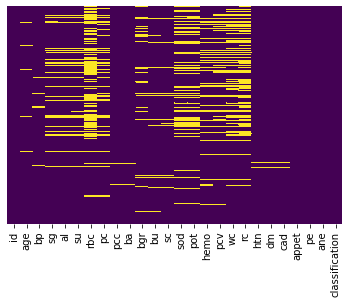

In [1045]:
sns.heatmap(kidni_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1046]:
kidni_data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

### showing percentage of missing data

In [1047]:

#missing data
total = kidni_data.isnull().sum().sort_values(ascending=False)
percent = (kidni_data.isnull().sum()/kidni_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing', 'Percent'])
missing_data

,Total_missing,Percent
rbc,152,0.3800
rc,130,0.3250
wc,105,0.2625
pot,88,0.2200
sod,87,0.2175
pcv,70,0.1750
pc,65,0.1625
hemo,52,0.1300
su,49,0.1225
sg,47,0.1175


*  There are **14 object fields** which needs to be encoded. 

*  All coloum has   **missing values** except **"id" and "classification"** .
**"Id"** is not a important coloum , it will be deleted.

# Data Visualization

## Visualization of Correlation of dataset before data pre-processing

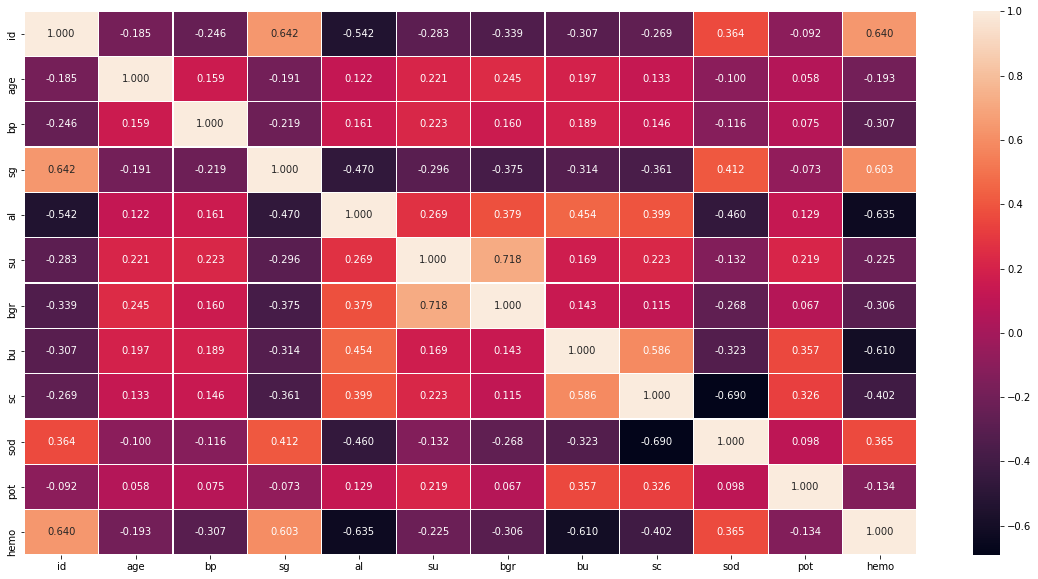

In [1048]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
sns.heatmap(kidni_data.corr(), annot=True, linewidths=0.3, fmt= '.3f')

In [1049]:
kidni_data.corr()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


# data preprocessing

# Encoding and Filling missing data of  all Feature 

# 'id'
"id" is not a important feature ,drop it

In [1050]:
Kidni_data=kidni_data.drop(columns=['id'])

# 'age'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


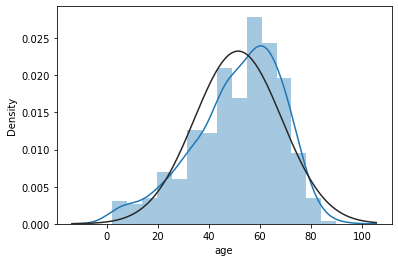

<Figure size 432x288 with 0 Axes>

In [1051]:
from scipy.stats import norm
sns.distplot(kidni_data['age'], fit=norm);
fig = plt.figure()

In [1052]:
kidni_data['age'].mean()

51.48337595907928

**"age"** is normally distribution ,whose mean is **51.48**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


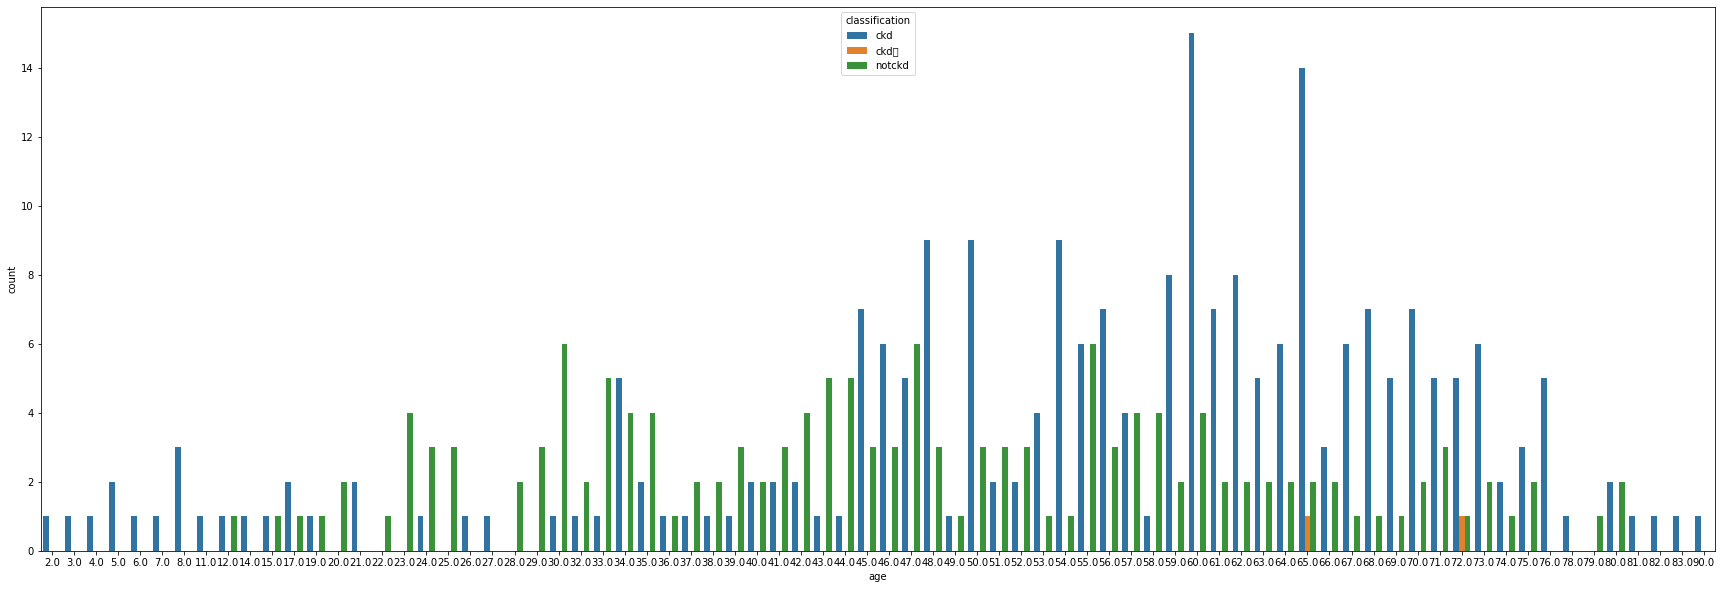

In [1053]:
plt.figure(figsize=(30,10))
sns.countplot('age',hue='classification',data=kidni_data)
plt.show()

see the **age** count plot  with respect of **classication** , kidni deases arise at any ages( from 2 to 90)

Filling the missing data with mean of the age as it is normal distribition

In [1054]:
kidni_data['age']=kidni_data['age'].fillna(51.48)

# 'sg'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


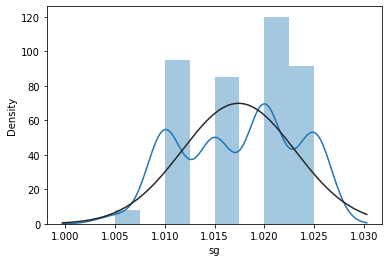

<Figure size 432x288 with 0 Axes>

In [1055]:
from scipy.stats import norm
sns.distplot(kidni_data['sg'], fit=norm);
fig = plt.figure()

In [1056]:
kidni_data['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

**"sg"** is discrete distribution ,whose max no of uses  is **1.020**
we can say also, most of peaple has "bp" is 1.020

The discrete values are  1.005,1.010,1.015,1.020,1.025

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


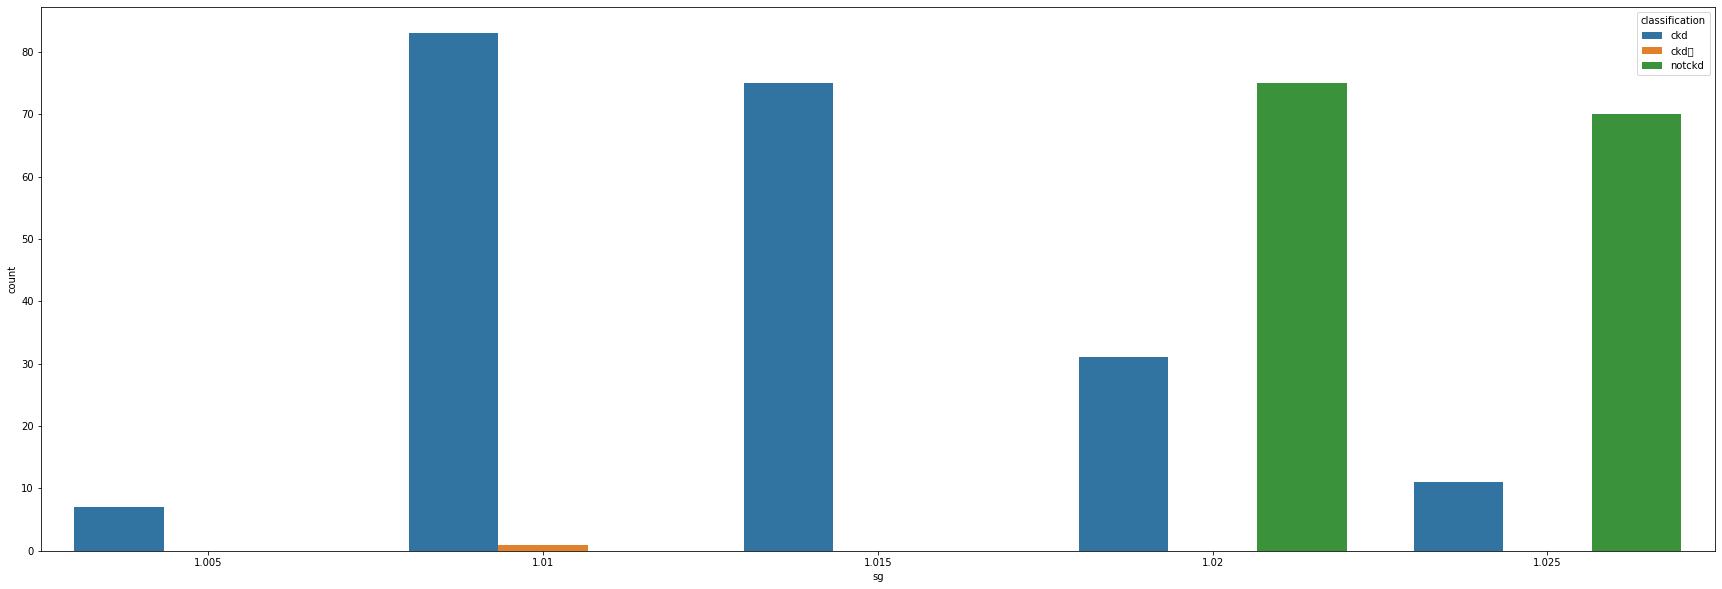

In [1057]:
plt.figure(figsize=(30,10))
sns.countplot('sg',hue='classification',data=kidni_data)
plt.show()

see the **sg** count plot  with respect of **classication** , for sg at 1.01 and 1.015 no **ckd** is high and for sg at 1.02 and 1.025 no **notckd** is high

Filling the missing data with 1.017 as it is maximum arise.

In [1058]:
kidni_data['sg']=kidni_data['sg'].fillna(1.020)

# "bp"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


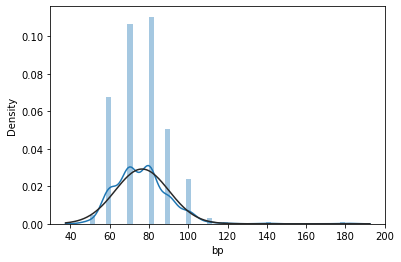

<Figure size 432x288 with 0 Axes>

In [1059]:
from scipy.stats import norm
sns.distplot(kidni_data['bp'], fit=norm);
fig = plt.figure()

In [1060]:
kidni_data['bp'].value_counts()

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
120.0      1
180.0      1
140.0      1
Name: bp, dtype: int64

**"bp"** is discrete distribution ,whose maximum no of uses is **80.0**
we can say also, most of peaple has "bp" is 80

The discrete values are  50,60,70,80,90,100,110,120,140,140.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


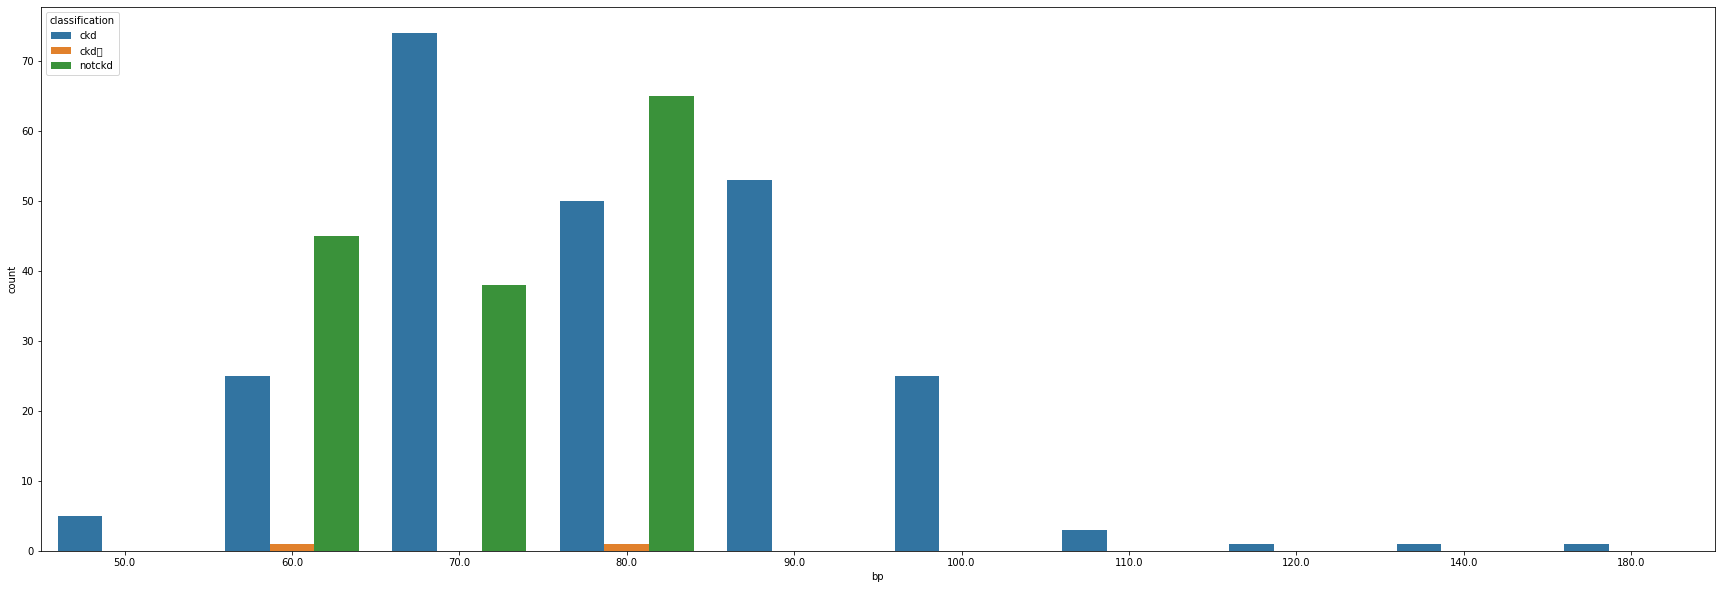

In [1061]:
plt.figure(figsize=(30,10))
sns.countplot('bp',hue='classification',data=kidni_data)
plt.show()

see the **bp** count plot  with respect of **classication** , for blood preasure 60,70,80, 90 is common for **ckd & notckd**

Filling the missing data with 80.0 as it is maximum arise.

In [1062]:
kidni_data['bp']=kidni_data['bp'].fillna(80.0)

# 'al'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


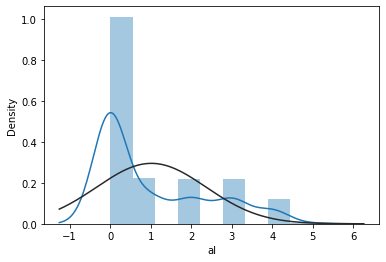

<Figure size 432x288 with 0 Axes>

In [1063]:
from scipy.stats import norm
sns.distplot(kidni_data['al'], fit=norm);
fig = plt.figure()

In [1064]:
kidni_data['al'].value_counts()

0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64

# **"al"** is discrete distribution ,whose max num is **0.0**
most of peaple has "al" is 0

The discrete values are  0,1,2,3,4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


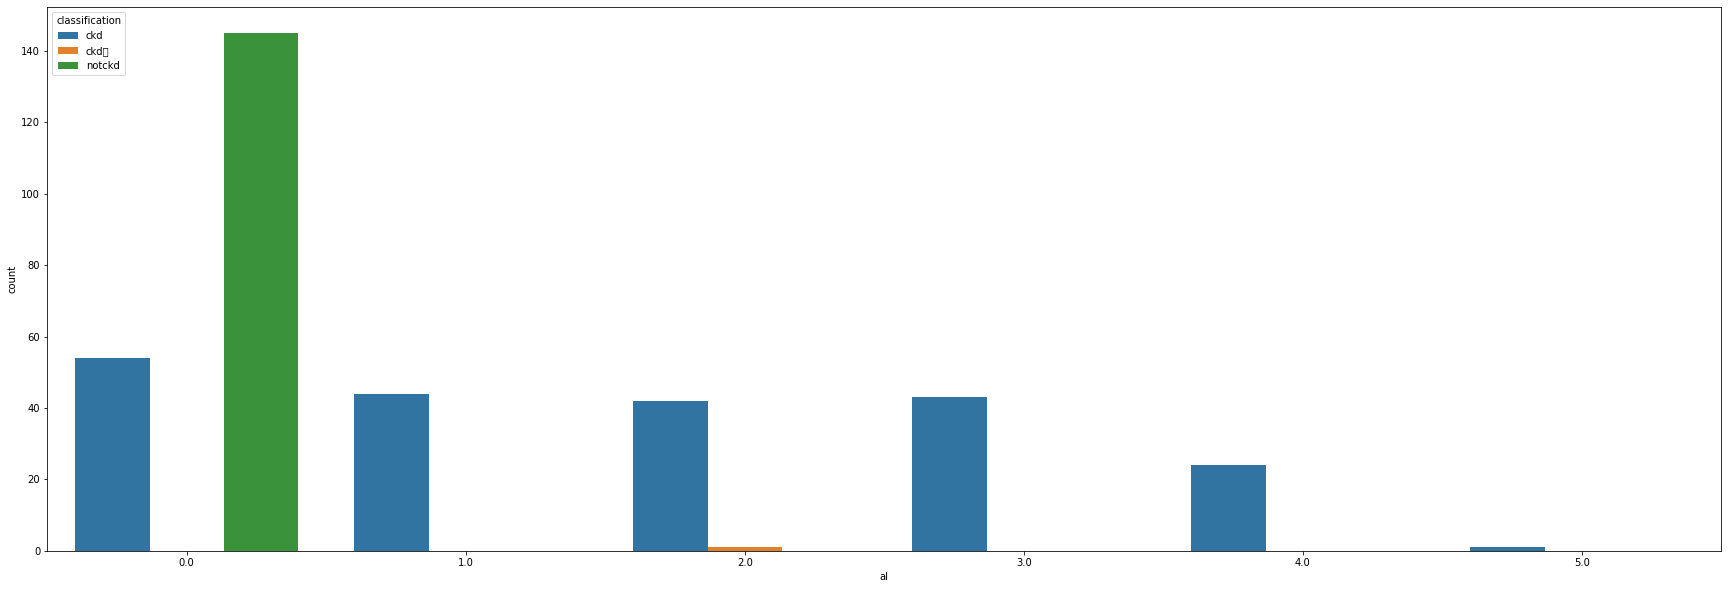

In [1065]:
plt.figure(figsize=(30,10))
sns.countplot('al',hue='classification',data=kidni_data)
plt.show()

see the **al** count plot  with respect of **classication** , for al at 0.0,1.0,2.0, 3.0, 4.0 **ckd** is high and for sg at 0.0 **notckd** is high

Filling the missing data with 0.0 as it is maximum arise.

In [1066]:
kidni_data['al']=kidni_data['al'].fillna(0.0)

# 'su'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


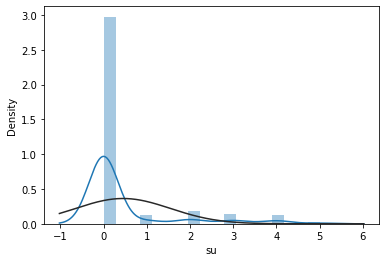

<Figure size 432x288 with 0 Axes>

In [1067]:
from scipy.stats import norm
sns.distplot(kidni_data['su'], fit=norm);
fig = plt.figure()

In [1068]:
kidni_data['su'].value_counts()

0.0    290
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: su, dtype: int64

# **"su"** is discrete distribution ,whose max no is **0.0**
most of peaple has "su" is 0.0

The discrete values are  0,1,2,3,4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


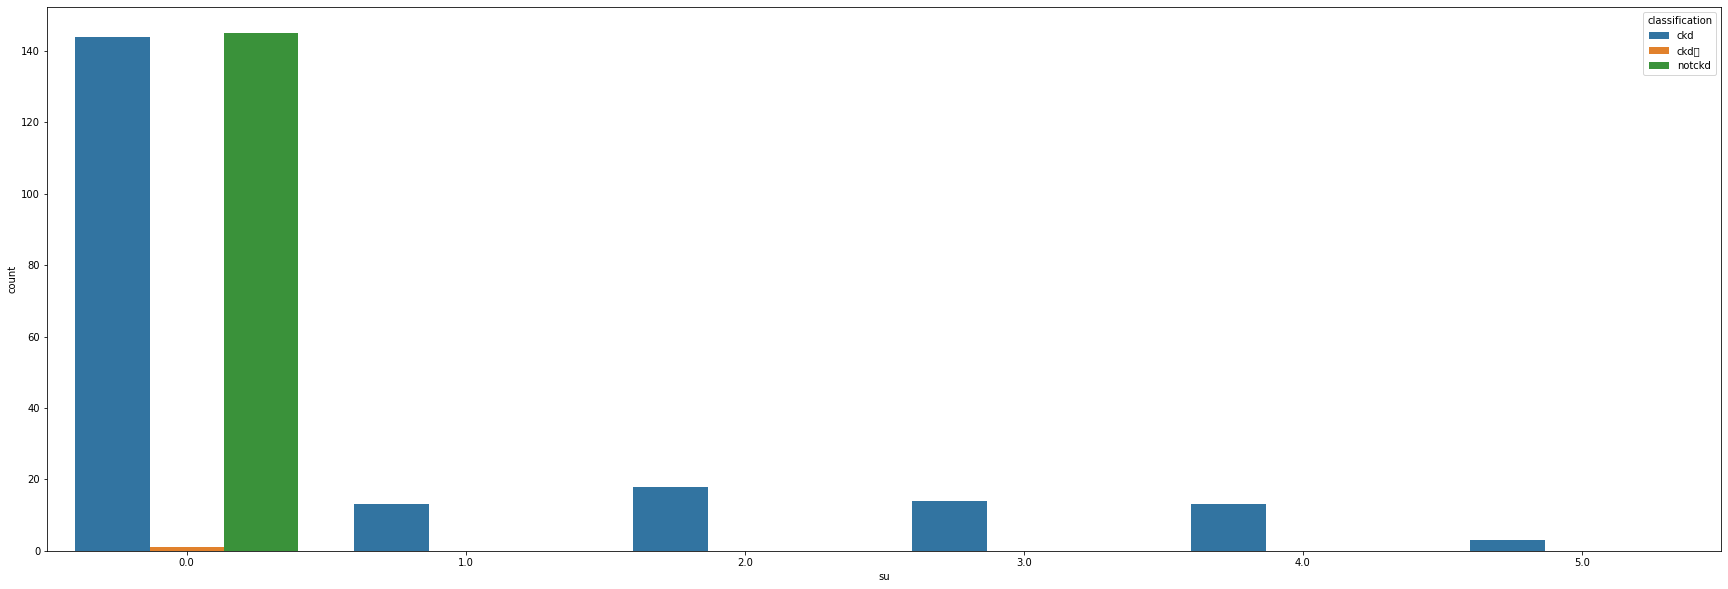

In [1069]:
plt.figure(figsize=(30,10))
sns.countplot('su',hue='classification',data=kidni_data)
plt.show()

see the **su** count plot  with respect of **classication** , for su at 0.0 **ckd** and **notckd** is high

Filling the missing data with 0.0 as it is maximum arise.

In [1070]:
kidni_data['su']=kidni_data['su'].fillna(0.0)

# 'rbc'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


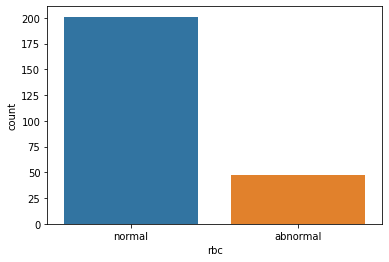

<Figure size 432x288 with 0 Axes>

In [1071]:
from scipy.stats import norm
sns.countplot(kidni_data['rbc']);
fig = plt.figure()

In [1072]:
kidni_data['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

# **"rbc"** is catagorical data
Normal 201
Abnormal 47

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


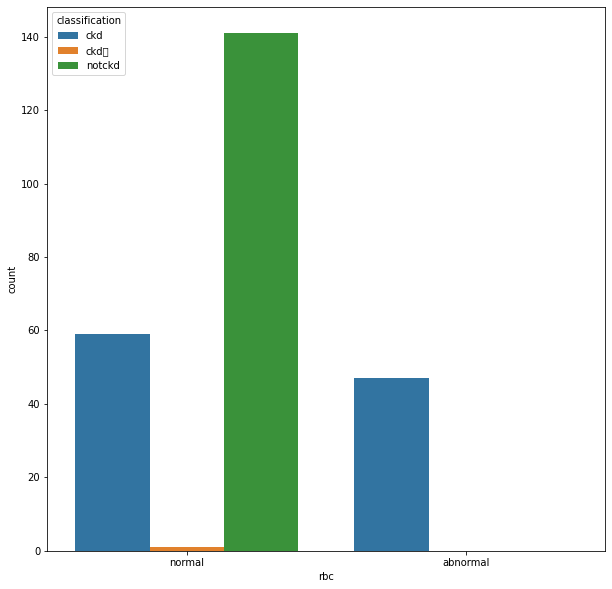

In [1073]:
plt.figure(figsize=(10,10))
sns.countplot('rbc',hue='classification',data=kidni_data)
plt.show()

see the **rbc** count plot  with respect of **classication** , for normal in rbc **ckd** and **notckd**   and for abnormal in rbc has only **ckd**

Filling the missing data with "normal" as it is maximum arise.

In [1074]:
kidni_data['rbc']=kidni_data['rbc'].fillna("noral")

# a universal function for label encoding

In [1075]:
# create a function for label encoding
def level_encoding(feature):
    feature_sort=kidni_data[feature].value_counts().index
    features={}
    j=0
    for i in feature_sort:
        features[i]=j
        j+=1
    kidni_data[feature]=kidni_data[feature].map(features)

In [1076]:
level_encoding('rbc')

normal    -  **0**

abnormal   -  **1**

# 'pc'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


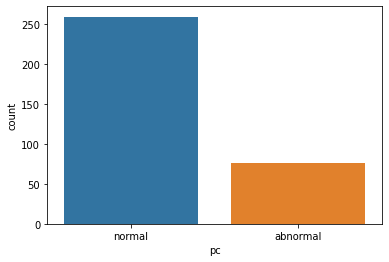

<Figure size 432x288 with 0 Axes>

In [1077]:
from scipy.stats import norm
sns.countplot(kidni_data['pc']);
fig = plt.figure()

In [1078]:
kidni_data['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

# **"pc"** is catagorical data
Normal 259
Abnormal 76

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


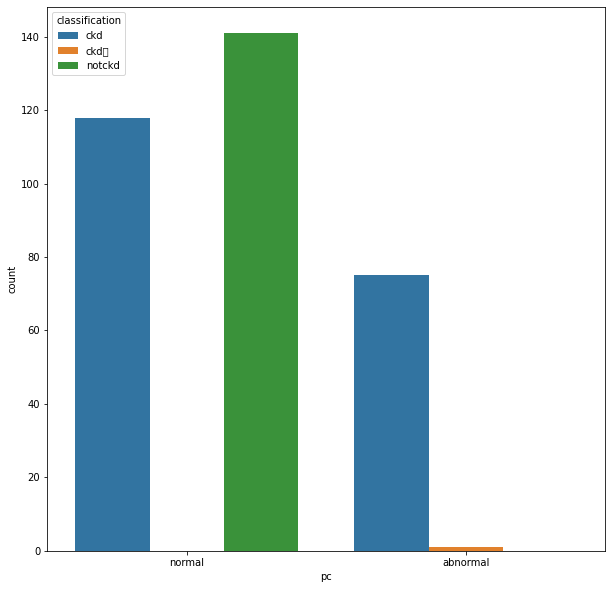

In [1079]:
plt.figure(figsize=(10,10))
sns.countplot('pc',hue='classification',data=kidni_data)
plt.show()

see the **pc** count plot  with respect of **classication** , for normal in rbc **ckd** and **notckd**   and for abnormal in rbc has only **ckd**

Filling the missing data with "normal" as it is maximum arise.

In [1080]:
kidni_data['pc']=kidni_data['pc'].fillna("normal")

In [1081]:
level_encoding('pc')

normal    -  **0**

abnormal   -  **1**

# 'pcc'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


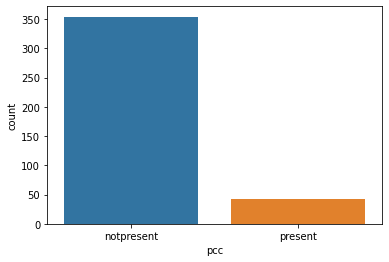

<Figure size 432x288 with 0 Axes>

In [1082]:
from scipy.stats import norm
sns.countplot(kidni_data['pcc']);
fig = plt.figure()

In [1083]:
kidni_data['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

# **"pcc"** is catagorical data
Notpresent 354
Present 42

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


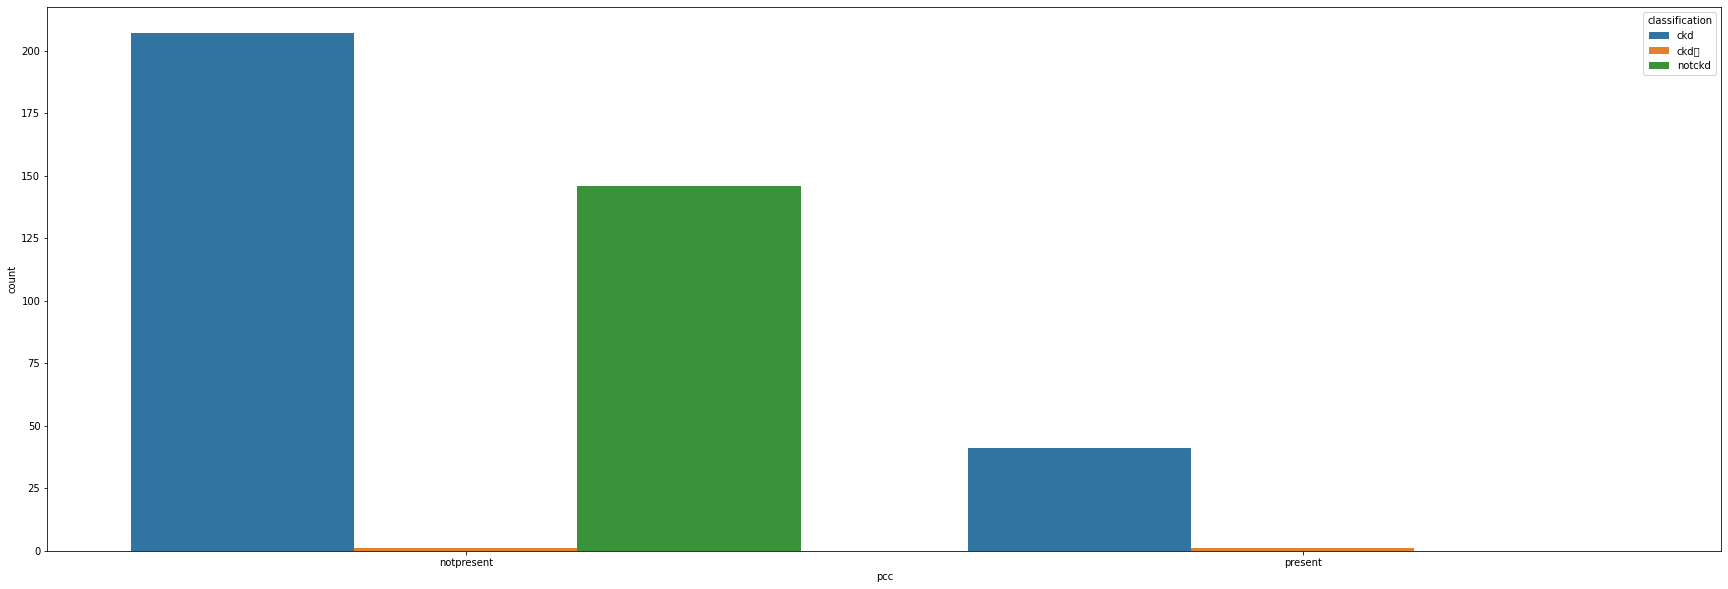

In [1084]:
plt.figure(figsize=(30,10))
sns.countplot('pcc',hue='classification',data=kidni_data)
plt.show()

see the **pcc** count plot  with respect of **classication** , for pcc at **notpresent** has **ckd** and **notckd** both and for pcc at **present** has only **notckd** 

Filling the missing data with "present" as it is maximum arise.

In [1085]:
kidni_data['pcc']=kidni_data['pcc'].fillna("present")

In [1086]:
level_encoding('pcc')

present    -  **0**

notpresent   -  **1**

# 'ba'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


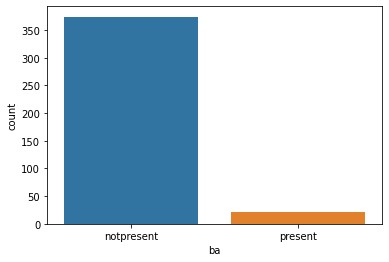

<Figure size 432x288 with 0 Axes>

In [1087]:
from scipy.stats import norm
sns.countplot(kidni_data['ba']);
fig = plt.figure()

In [1088]:
kidni_data['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

# **"ba"** is catagorical data
Notpresent 374
Present 22

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


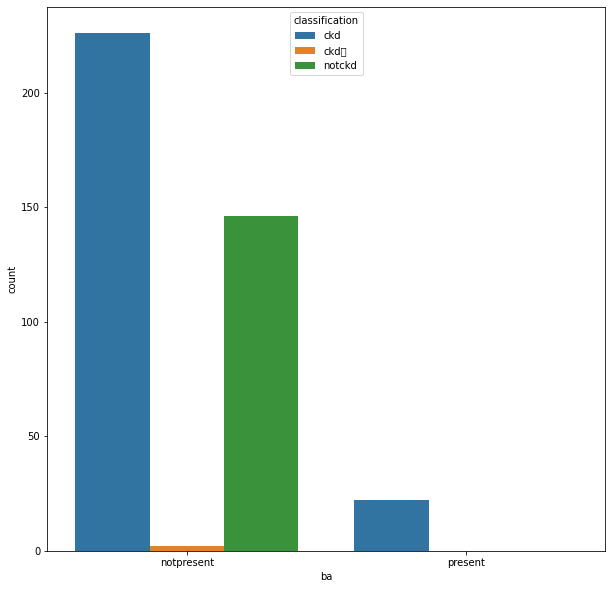

In [1089]:
plt.figure(figsize=(10,10))
sns.countplot('ba',hue='classification',data=kidni_data)
plt.show()

see the **pcc** count plot  with respect of **classication** , for pcc at **notpresent** has **ckd** and **notckd** both and for pcc at **present** has only **notckd** 

Filling the missing data with "present" as it is maximum arise.

In [1090]:
kidni_data['ba']=kidni_data['ba'].fillna("present")

In [1091]:
level_encoding('ba')

present    -  **0**

notpresent   -  **1**

#'bgr'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


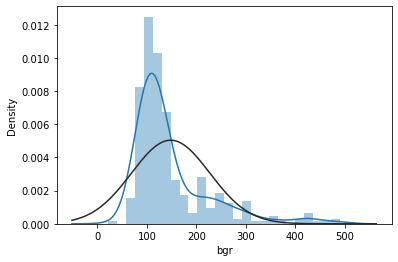

<Figure size 432x288 with 0 Axes>

In [1092]:
from scipy.stats import norm
sns.distplot(kidni_data['bgr'], fit=norm);
fig = plt.figure()

In [1093]:
kidni_data['bgr'].mean()

148.0365168539326

# **"bgr"** is normal distribution ,whose mean is **145.06**
most of peaple has "bgr" is 145.06
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


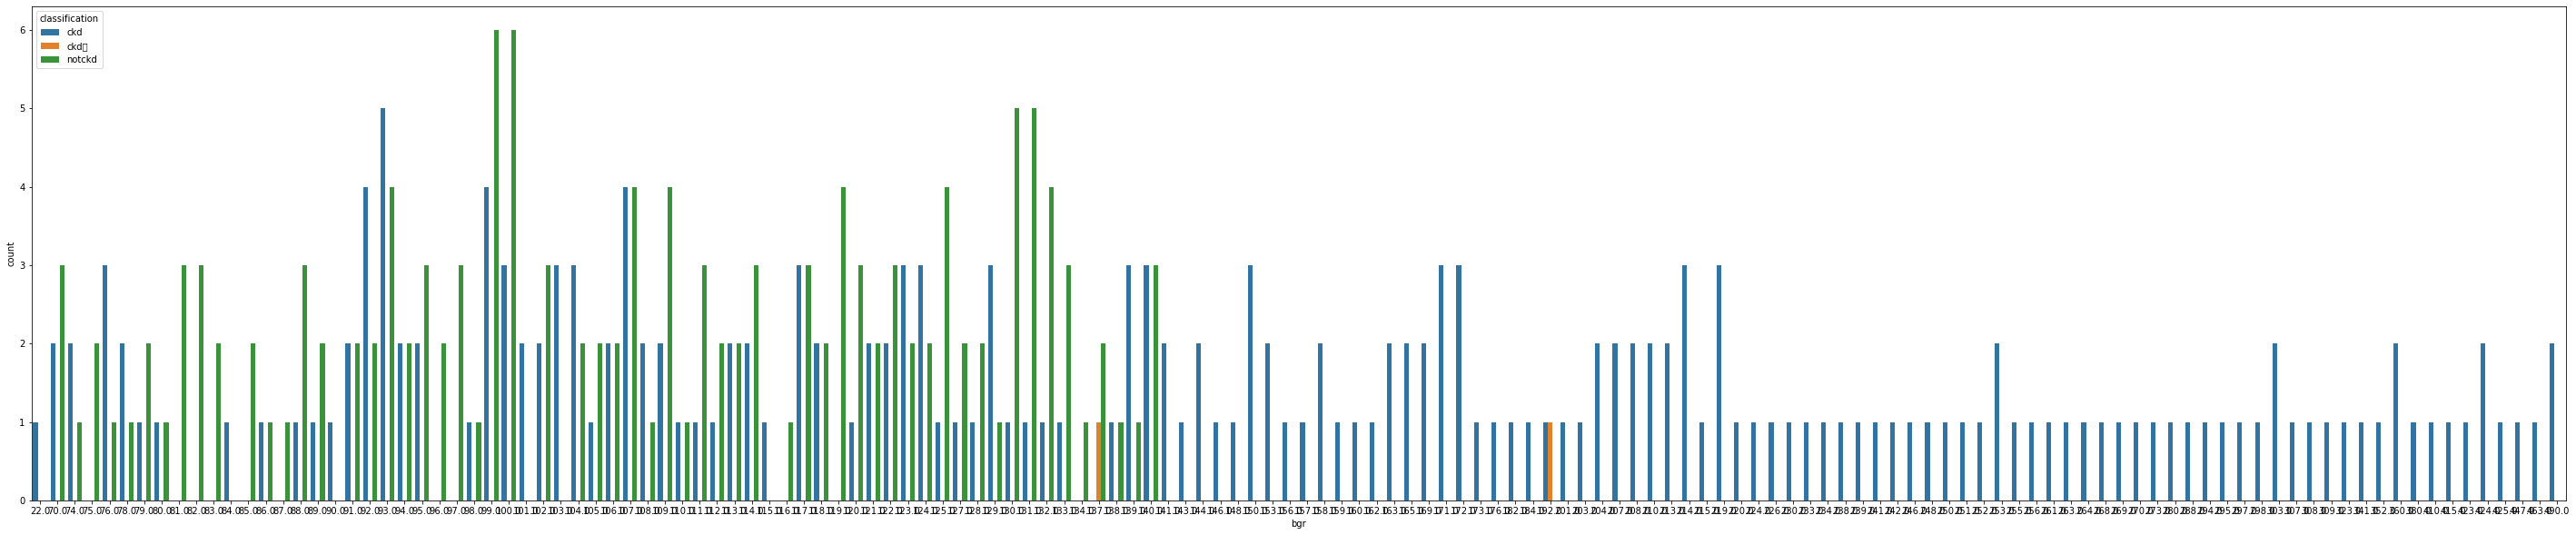

In [1094]:
plt.figure(figsize=(50,10))
sns.countplot('bgr',hue='classification',data=kidni_data)
plt.show()

*see* the **bgr** count plot  with respect of **classication** , kidni deases arise at any bgr ( from 22 to 500) and not kidni deases arise at any bgr( from 22 to 200) and 

Filling the missing data with mean of the age as it is normal distribition

In [1095]:
kidni_data['bgr']=kidni_data['bgr'].fillna(145.06)

# 'bu'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


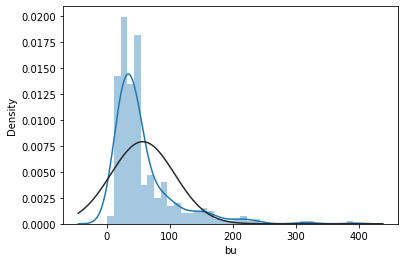

<Figure size 432x288 with 0 Axes>

In [1096]:
from scipy.stats import norm
sns.distplot(kidni_data['bu'], fit=norm);
fig = plt.figure()

In [1097]:
kidni_data['bu'].mean()

57.425721784776904

# **"bu"** is normal distribution ,whose mean is **56.408**
most of peaple has "bu" is 56.408

The didtribution in range of 0 to 250

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


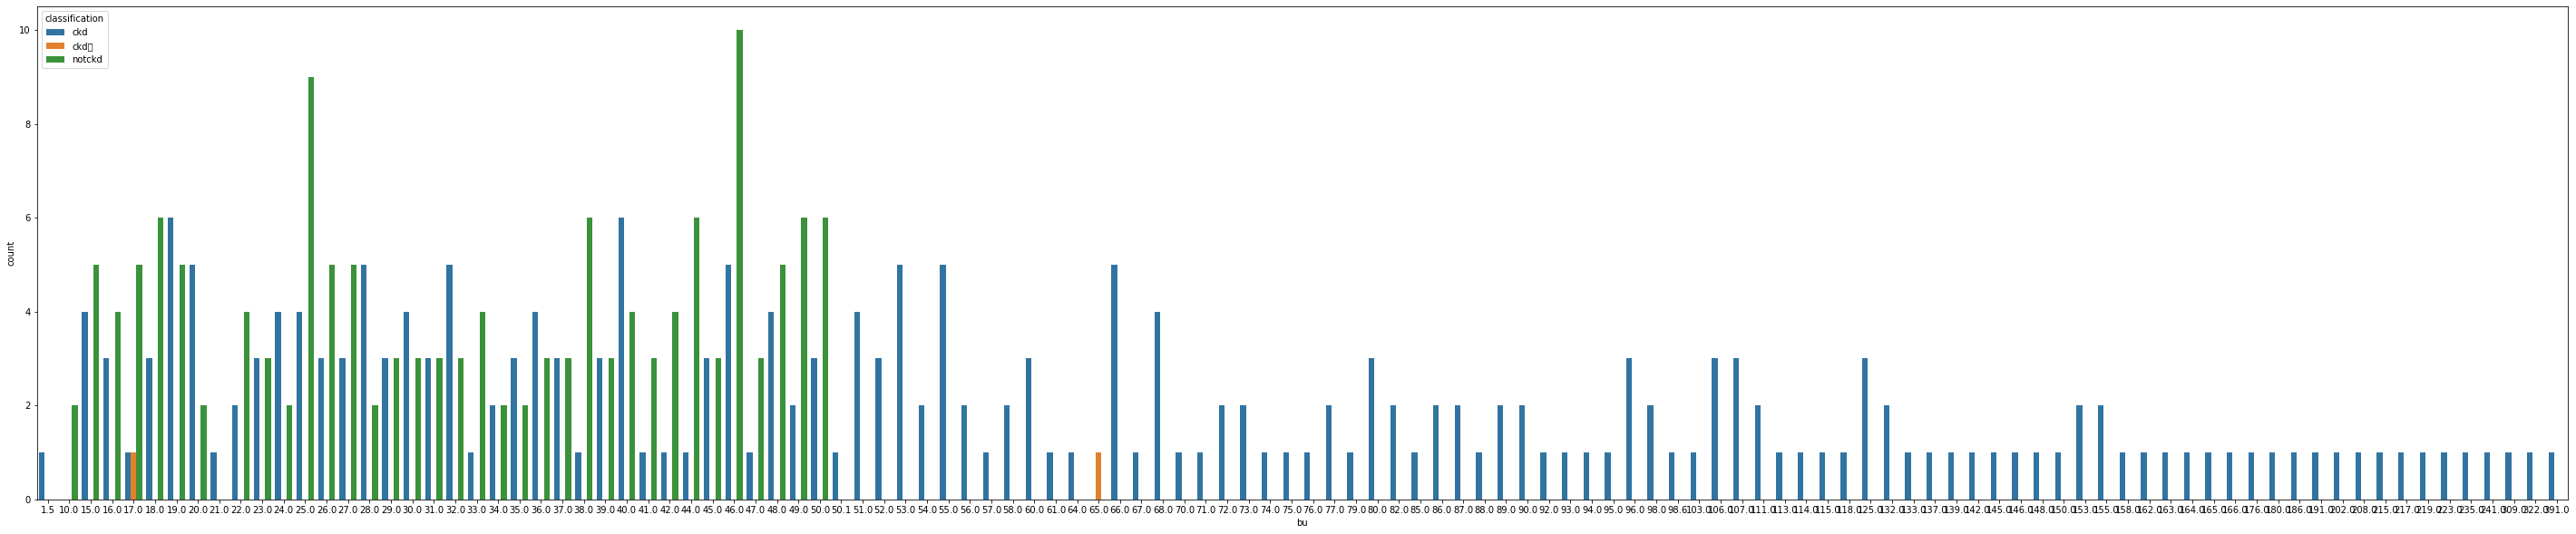

In [1098]:
plt.figure(figsize=(50,10))
sns.countplot('bu',hue='classification',data=kidni_data)
plt.show()

*see* the **bu** count plot  with respect of **classication** , kidni deases arise at any bu ( from 15 to 391) and not kidni deases arise at any bu( from 15 to 65) and 

Filling the missing data with 0.0 as it is maximum arise.

In [1099]:
kidni_data['bu']=kidni_data['bu'].fillna(56.408)

# 'sc'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


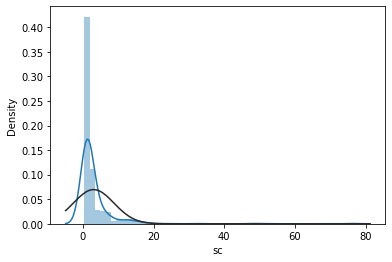

<Figure size 432x288 with 0 Axes>

In [1100]:
from scipy.stats import norm
sns.distplot(kidni_data['sc'], fit=norm);
fig = plt.figure()

In [1101]:
kidni_data['sc'].mean()

3.0724543080939934

# **"sc"** is normal distribution ,whose mean is **3.07**
most of peaple has "sc" is 3.07



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


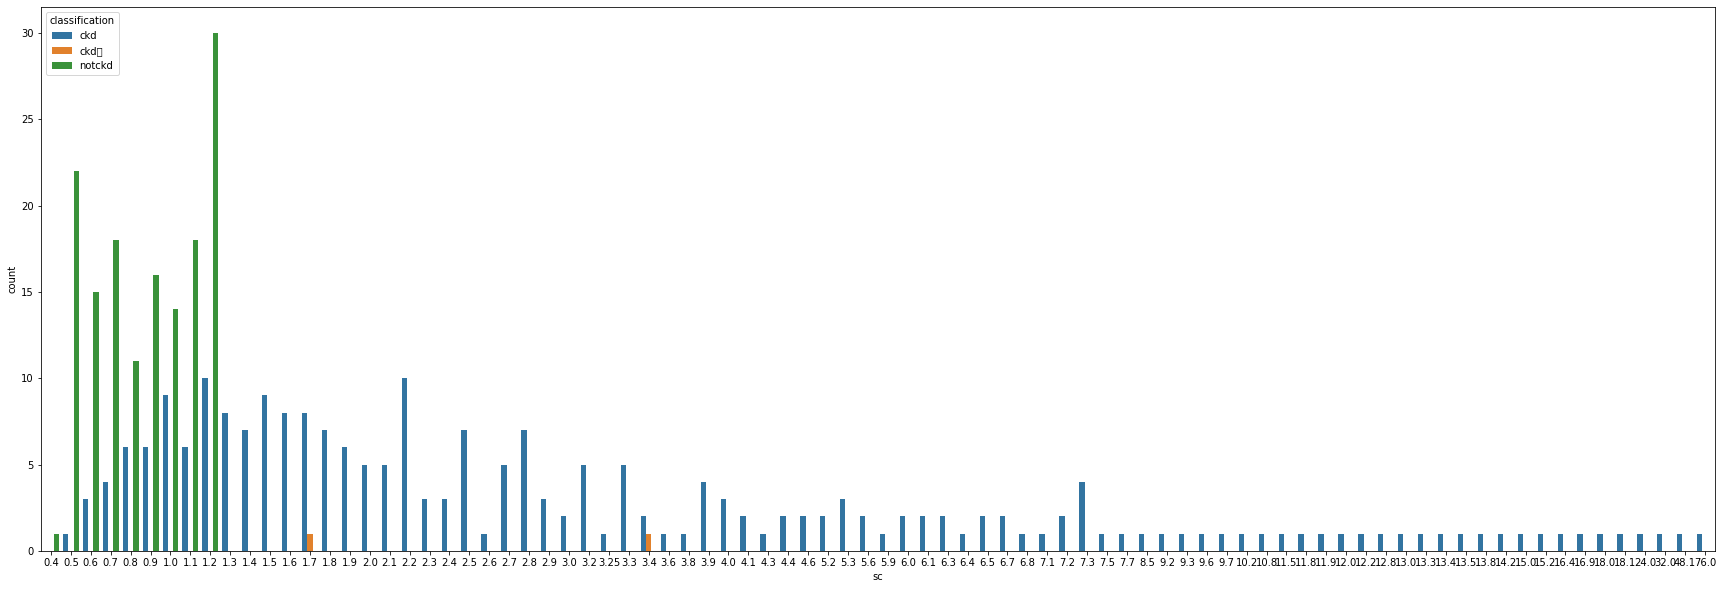

In [1102]:
plt.figure(figsize=(30,10))
sns.countplot('sc',hue='classification',data=kidni_data)
plt.show()

*see* the **sc** count plot  with respect of **classication** , kidni deases arise at any sc( from 0.4 to 176.0) and not kidni deases arise at any su( from 0.4 to 1.3) 

Filling the missing data with 3.07 as it is maximum arise.

In [1103]:
kidni_data['sc']=kidni_data['sc'].fillna(3.07)

# 'sod'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


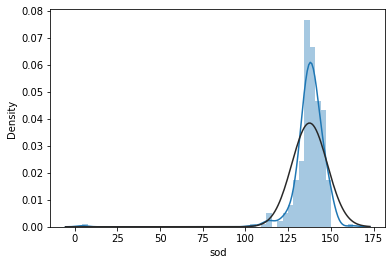

<Figure size 432x288 with 0 Axes>

In [1104]:
from scipy.stats import norm
sns.distplot(kidni_data['sod'], fit=norm);
fig = plt.figure()

In [1105]:
kidni_data['sod'].mean()

137.52875399361022

# **"sod"** is normal distribution ,whose mean is **137.58**
most of peaple has "sod" is 137.58



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


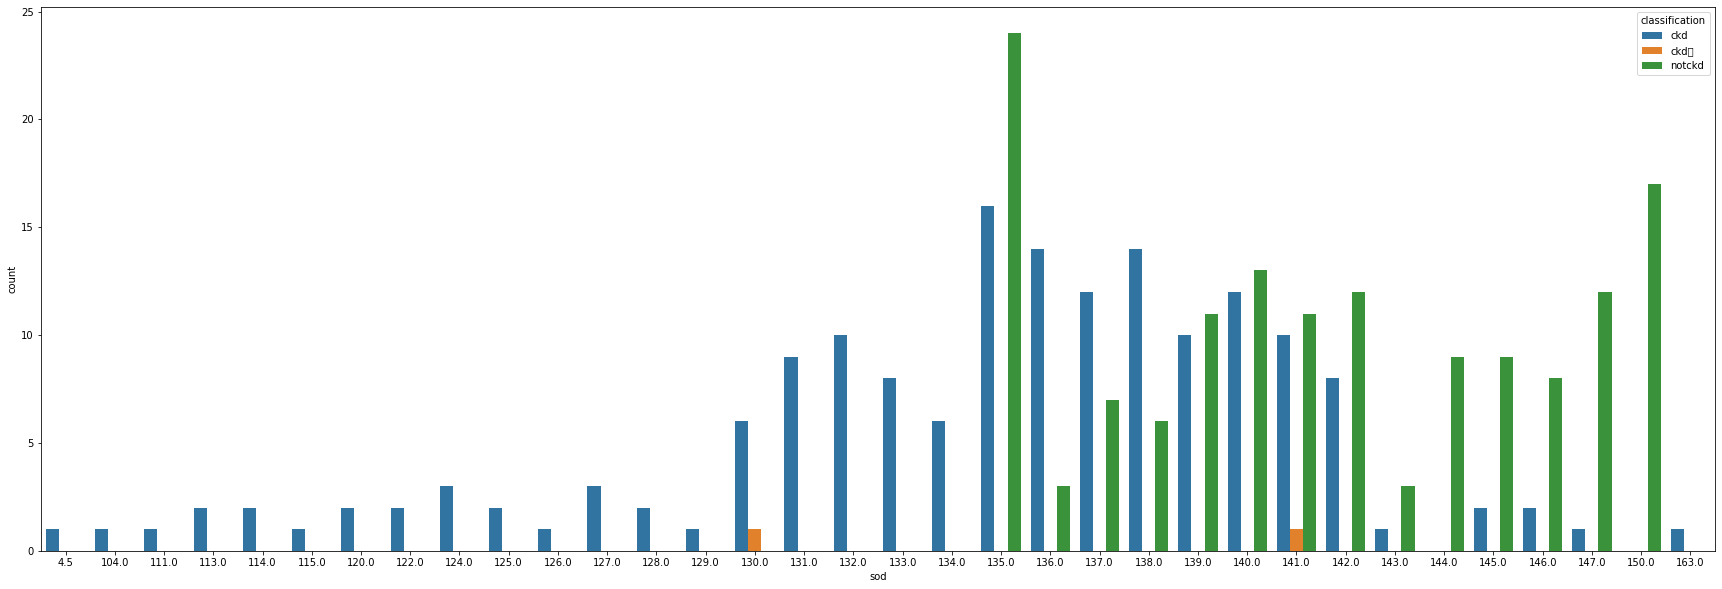

In [1106]:
plt.figure(figsize=(30,10))
sns.countplot('sod',hue='classification',data=kidni_data)
plt.show()

*see* the **sod** count plot  with respect of **classication** , kidni deases arise at any su ( from 4.6 to 163) and not kidni deases arise at any su( from 130.0 to 163.0) 

Filling the missing data with 137.58 as it is maximum arise.

In [1107]:
kidni_data['sod']=kidni_data['sod'].fillna(137.58)

#'pot'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


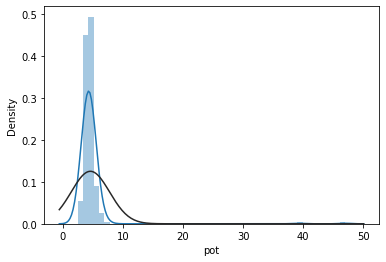

<Figure size 432x288 with 0 Axes>

In [1108]:
from scipy.stats import norm
sns.distplot(kidni_data['pot'], fit=norm);
fig = plt.figure()

In [1109]:
kidni_data['pot'].mean()

4.627243589743592

# **"pot"** is normal distribution ,whose mean is **4.62**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


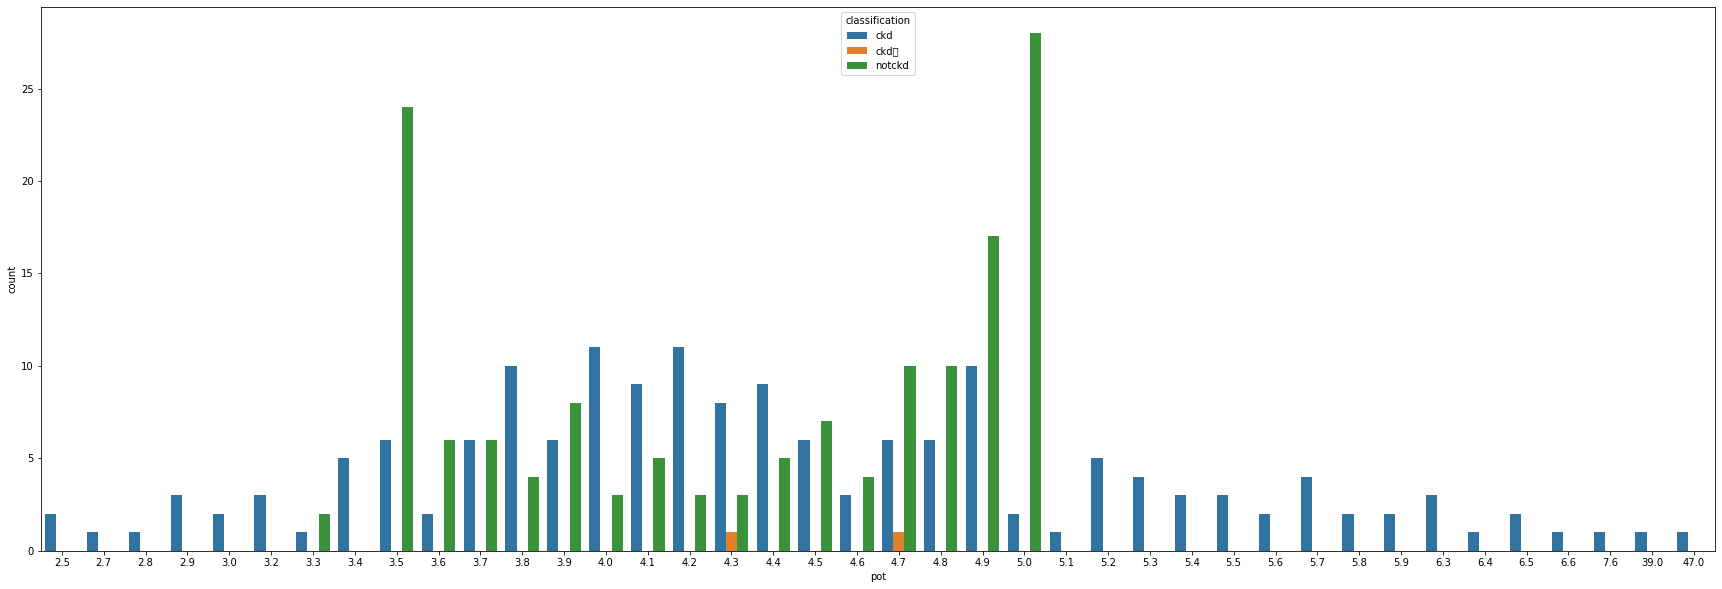

In [1110]:
plt.figure(figsize=(30,10))
sns.countplot('pot',hue='classification',data=kidni_data)
plt.show()

see the **pot** count plot  with respect of **classication** , 

Filling the missing data with 4.62 as it is maximum arise.

In [1111]:
kidni_data['pot']=kidni_data['pot'].fillna(4.62)

# 'hemo'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


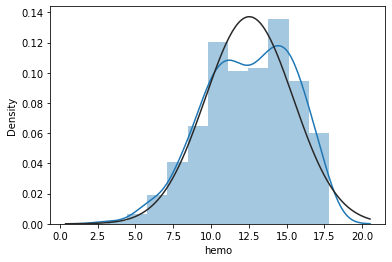

<Figure size 432x288 with 0 Axes>

In [1112]:
from scipy.stats import norm
sns.distplot(kidni_data['hemo'], fit=norm);
fig = plt.figure()

In [1113]:
kidni_data['hemo'].mean()

12.526436781609195

# **"hemo"** is normal distribution ,whose mean is **12.52**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


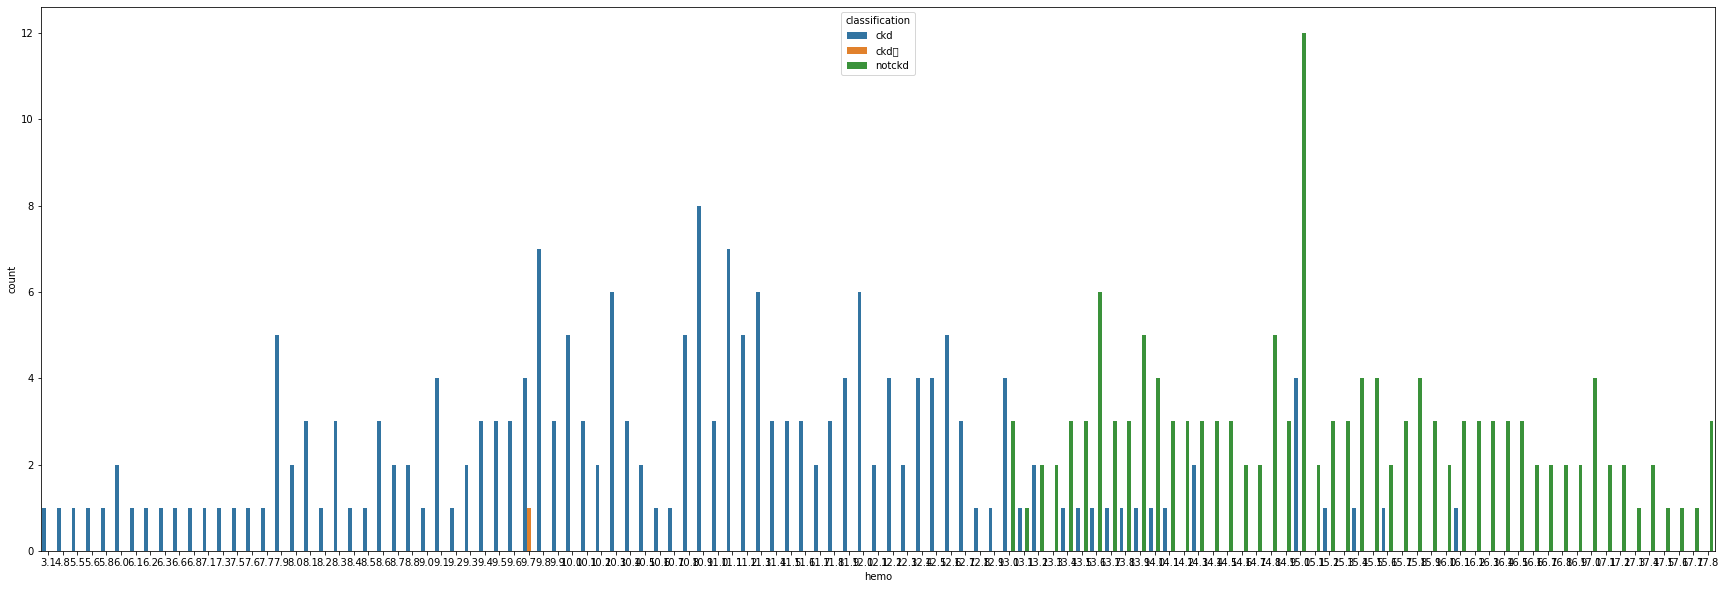

In [1114]:
plt.figure(figsize=(30,10))
sns.countplot('hemo',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with 12.52 as it is maximum arise.

In [1115]:
kidni_data['hemo']=kidni_data['hemo'].fillna(12.51)

# 'pcv'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


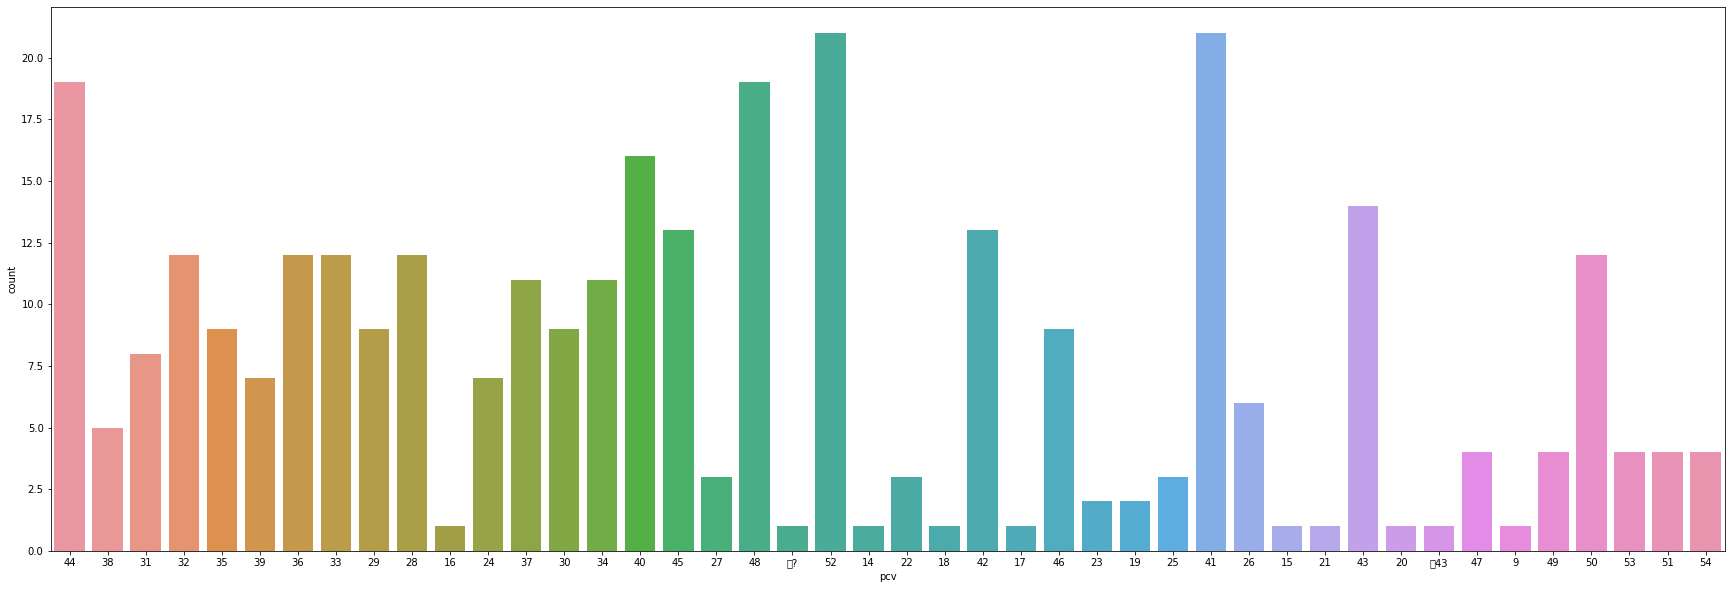

<Figure size 432x288 with 0 Axes>

In [1116]:
plt.figure(figsize=(30,10))
sns.countplot(kidni_data['pcv']);
fig = plt.figure()

In [1117]:
kidni_data['pcv'].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
28      12
32      12
50      12
33      12
36      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
54       4
51       4
47       4
49       4
22       3
25       3
27       3
19       2
23       2
20       1
16       1
18       1
21       1
\t?      1
9        1
14       1
15       1
\t43     1
17       1
Name: pcv, dtype: int64

# **"pcv"** is discrete distribution ,whose max no is **41**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


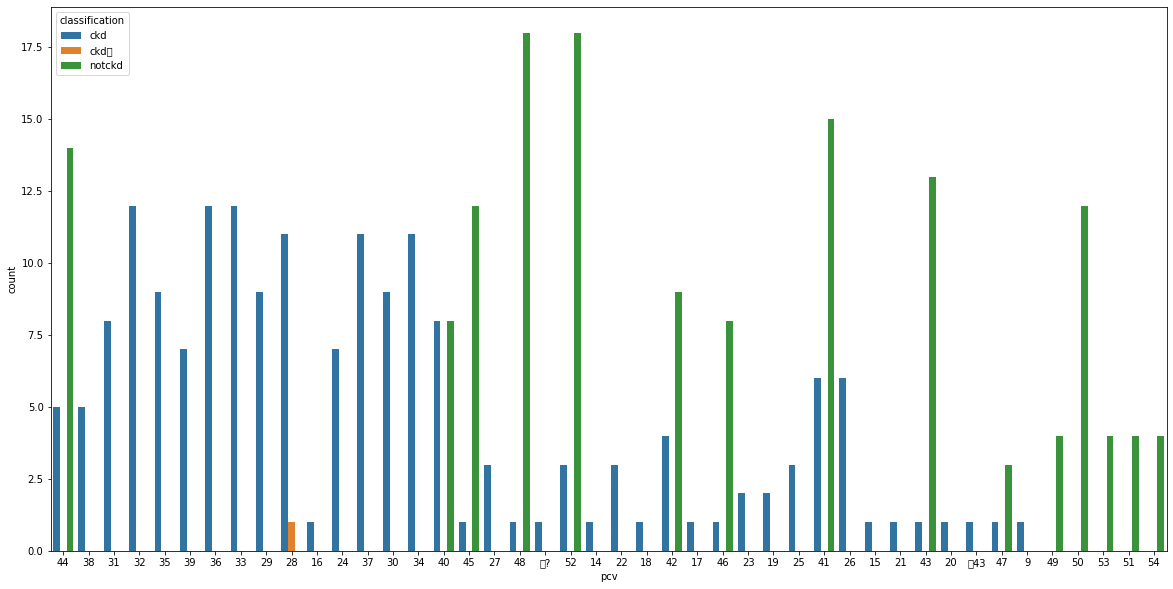

In [1118]:
plt.figure(figsize=(20,10))
sns.countplot('pcv',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with 41 as it is maximum arise.

In [1119]:
kidni_data['pcv']=kidni_data['pcv'].fillna(41)

# there is some noice , we need to replace it with some valuable data

In [1120]:
kidni_data['pcv'].replace({"\t?": 41, "\t43": 41}, inplace=True)
#kidni_data['pcv'].value_counts()

# 'wc'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


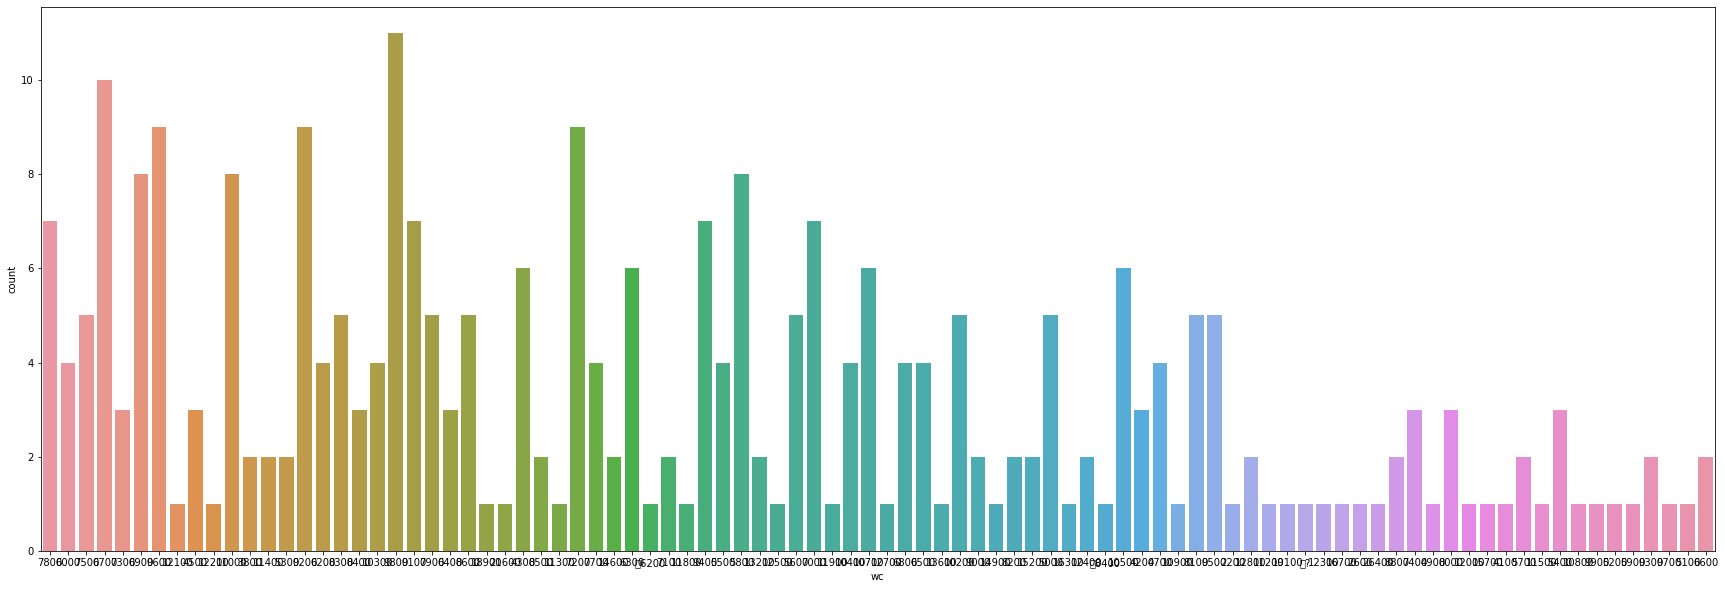

<Figure size 432x288 with 0 Axes>

In [1121]:
plt.figure(figsize=(30,10))
sns.countplot(kidni_data['wc']);
fig = plt.figure()

In [1122]:
kidni_data['wc'].value_counts()

9800     11
6700     10
9200      9
7200      9
9600      9
         ..
12300     1
4900      1
19100     1
11800     1
\t?       1
Name: wc, Length: 92, dtype: int64

In [1123]:
kidni_data['wc'].value_counts().index

Index(['9800', '6700', '9200', '7200', '9600', '6900', '11000', '5800', '7000',
       '9100', '7800', '9400', '10700', '4300', '10500', '6300', '7900',
       '5000', '5600', '9500', '7500', '8100', '8300', '10200', '8600',
       '10300', '6000', '6500', '7700', '5500', '6800', '10400', '6200',
       '4700', '7300', '8000', '4500', '4200', '8400', '5400', '7400', '6400',
       '7100', '3800', '9300', '9000', '8500', '8800', '12800', '8200', '6600',
       '5700', '14600', '11400', '15200', '12400', '5300', '13200', '12500',
       '21600', '\t6200', '14900', '2600', '12200', '\t8400', '12700', '16300',
       '16700', '18900', '11300', '10900', '10800', '11900', '11200', '12000',
       '2200', '26400', '12100', '11500', '9700', '13600', '5900', '5200',
       '4100', '5100', '9900', '15700', '12300', '4900', '19100', '11800',
       '\t?'],
      dtype='object')

# **"wc"** is discrete distribution 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


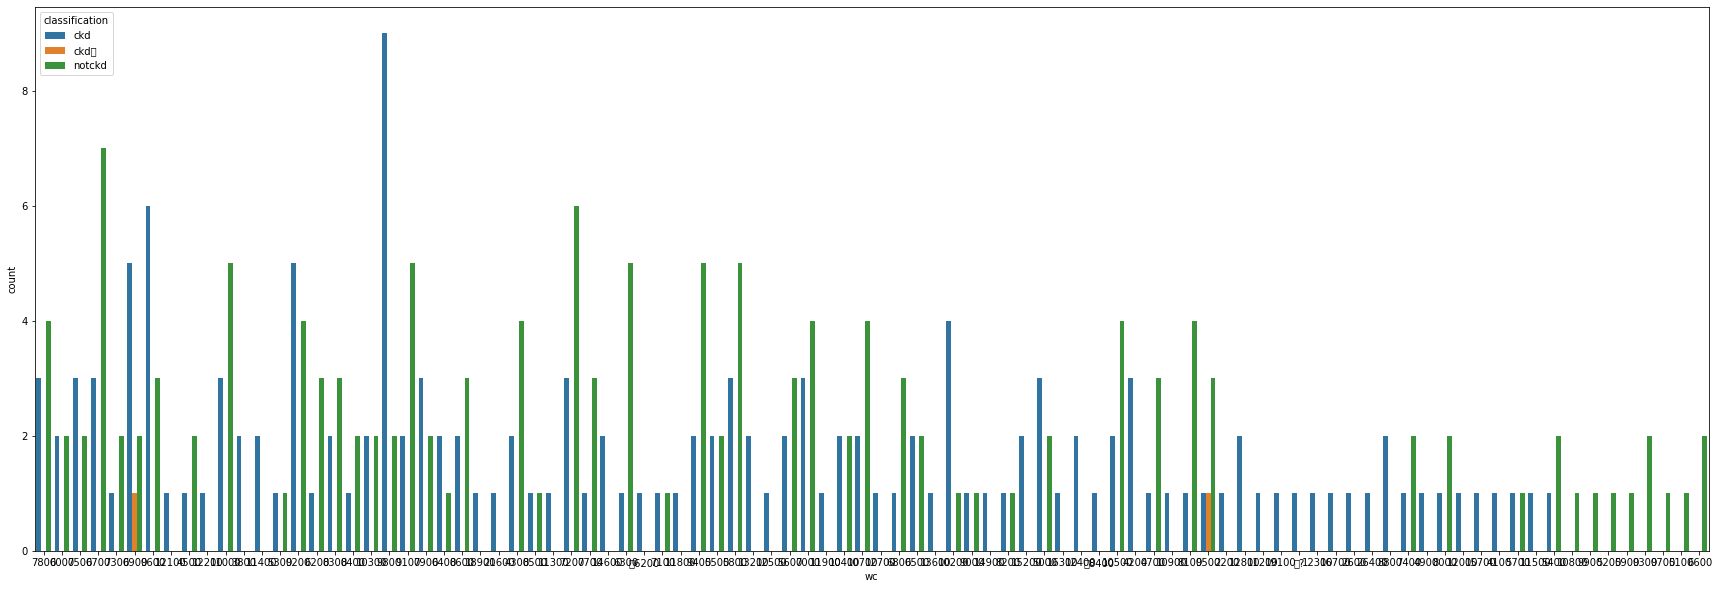

In [1124]:
plt.figure(figsize=(30,10))
sns.countplot('wc',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with 9800 as it is maximum arise.

In [1125]:
kidni_data['wc']=kidni_data['wc'].fillna(9800)

# there is some noice , we need to replace it with some valuable data

In [1126]:
kidni_data['wc'].replace({"\t?": 9800, "\t8400": 9800,"\t8400":9800}, inplace=True)

# 'rc'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


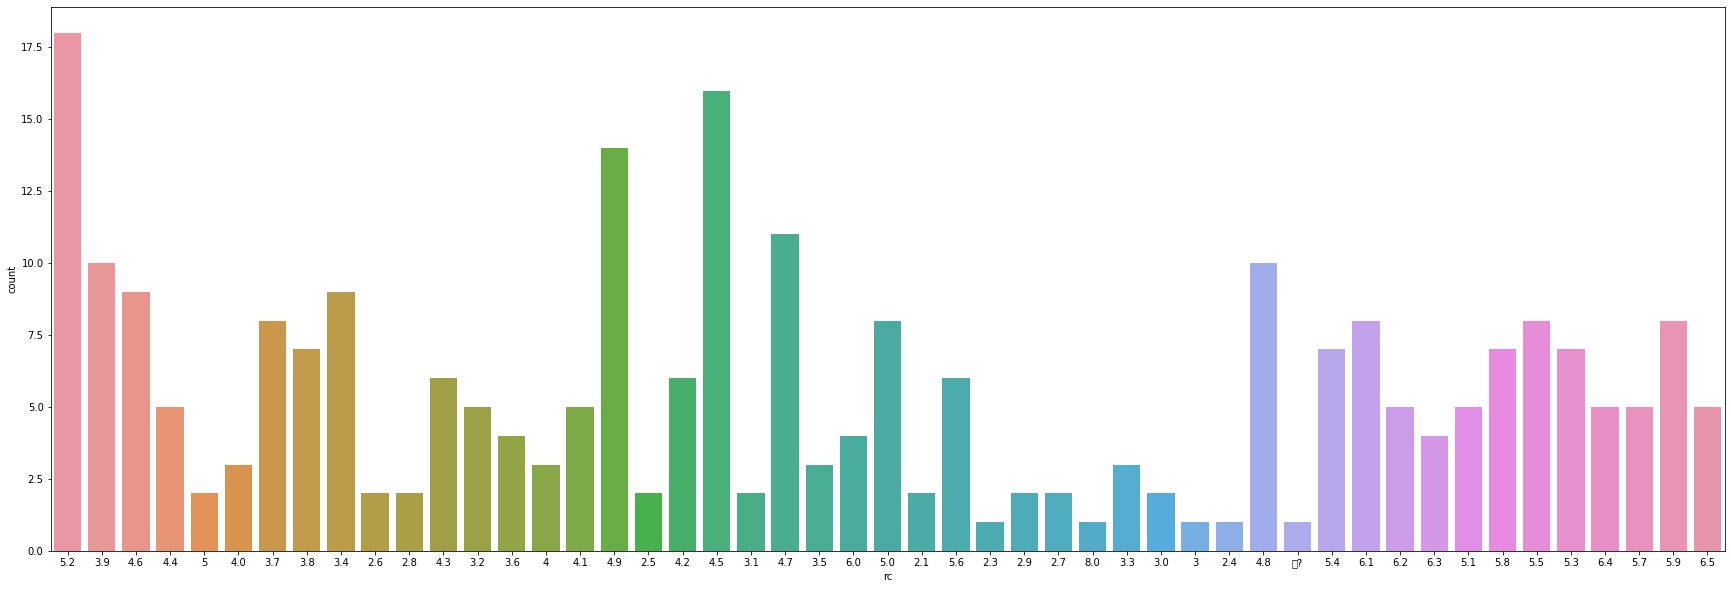

<Figure size 432x288 with 0 Axes>

In [1127]:
plt.figure(figsize=(30,10))
sns.countplot(kidni_data['rc']);
fig = plt.figure()

In [1128]:
kidni_data['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
6.1     8
5.0     8
3.7     8
5.5     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.2     6
4.3     6
5.1     5
6.2     5
3.2     5
6.5     5
4.1     5
6.4     5
4.4     5
5.7     5
3.6     4
6.0     4
6.3     4
3.5     3
4.0     3
4       3
3.3     3
2.9     2
2.8     2
3.1     2
3.0     2
2.5     2
2.7     2
2.1     2
5       2
2.6     2
2.3     1
8.0     1
2.4     1
\t?     1
3       1
Name: rc, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


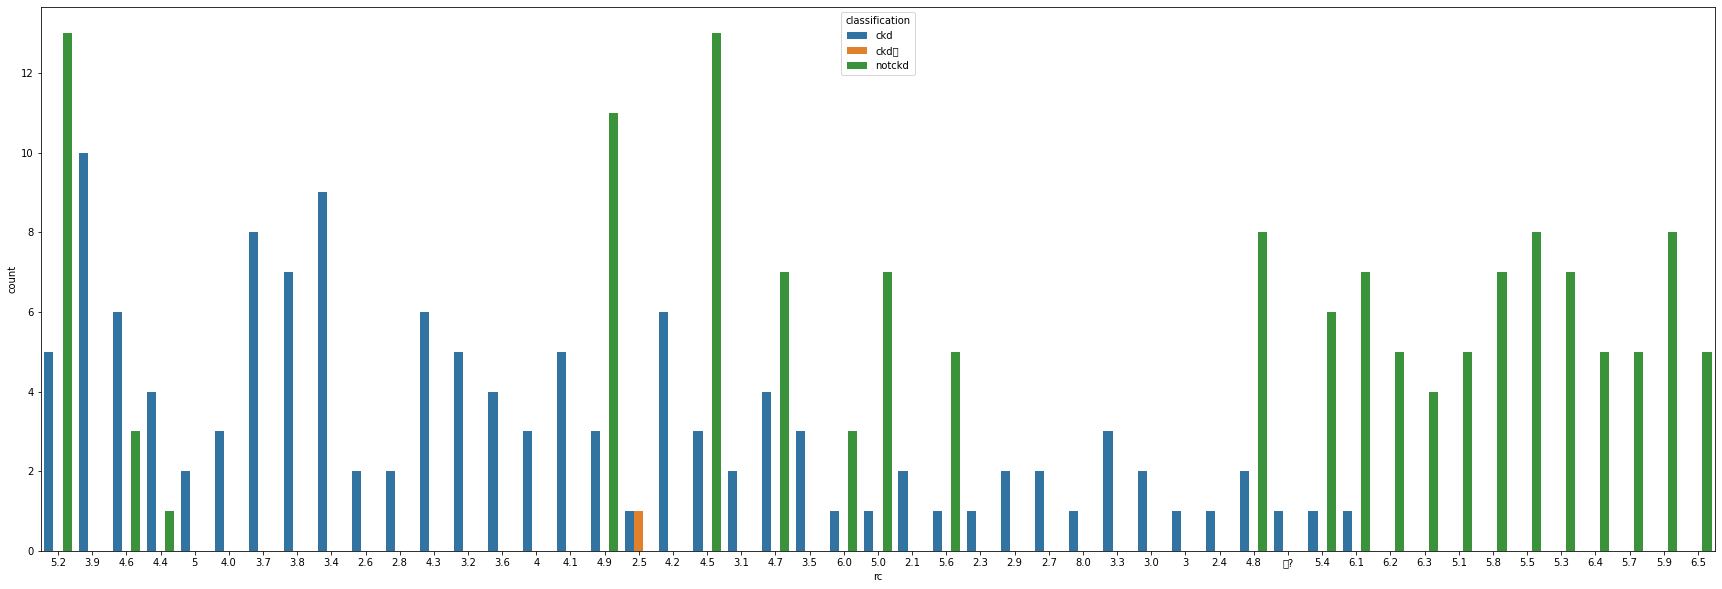

In [1129]:
plt.figure(figsize=(30,10))
sns.countplot('rc',hue='classification',data=kidni_data)
plt.show()

In [1130]:
kidni_data['rc']=kidni_data['rc'].fillna(5.2)

# there is some noice , we need to replace it with some valuable data

In [1131]:
kidni_data['rc'].replace({"\t?": 5.2}, inplace=True)

In [1132]:
level_encoding('rc')

# 'htn'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


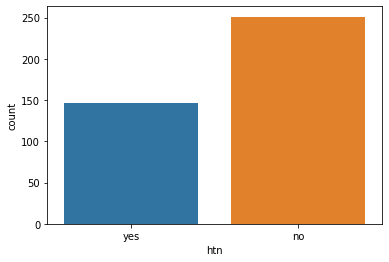

<Figure size 432x288 with 0 Axes>

In [1133]:
from scipy.stats import norm
sns.countplot(kidni_data['htn']);
fig = plt.figure()

In [1134]:
kidni_data['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


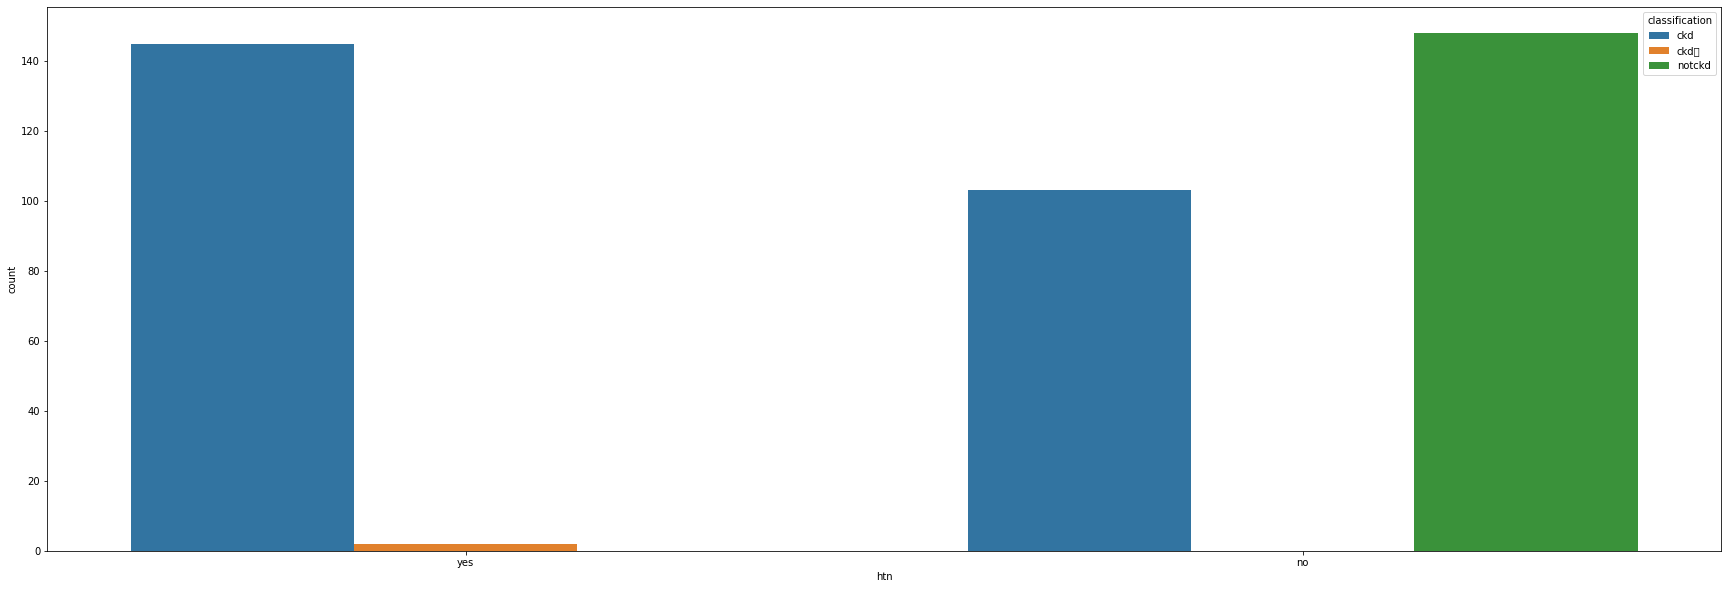

In [1135]:
plt.figure(figsize=(30,10))
sns.countplot('htn',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with "no" as it is maximum arise.

In [1136]:
kidni_data['htn']=kidni_data['htn'].fillna("no")

In [1137]:
level_encoding('htn')

no    -  **0**

yes   -  **1**

#  'dm'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


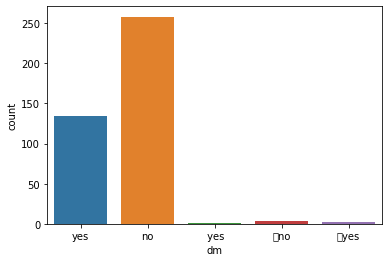

<Figure size 432x288 with 0 Axes>

In [1138]:

sns.countplot(kidni_data['dm'], );
fig = plt.figure()

In [1139]:
kidni_data['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


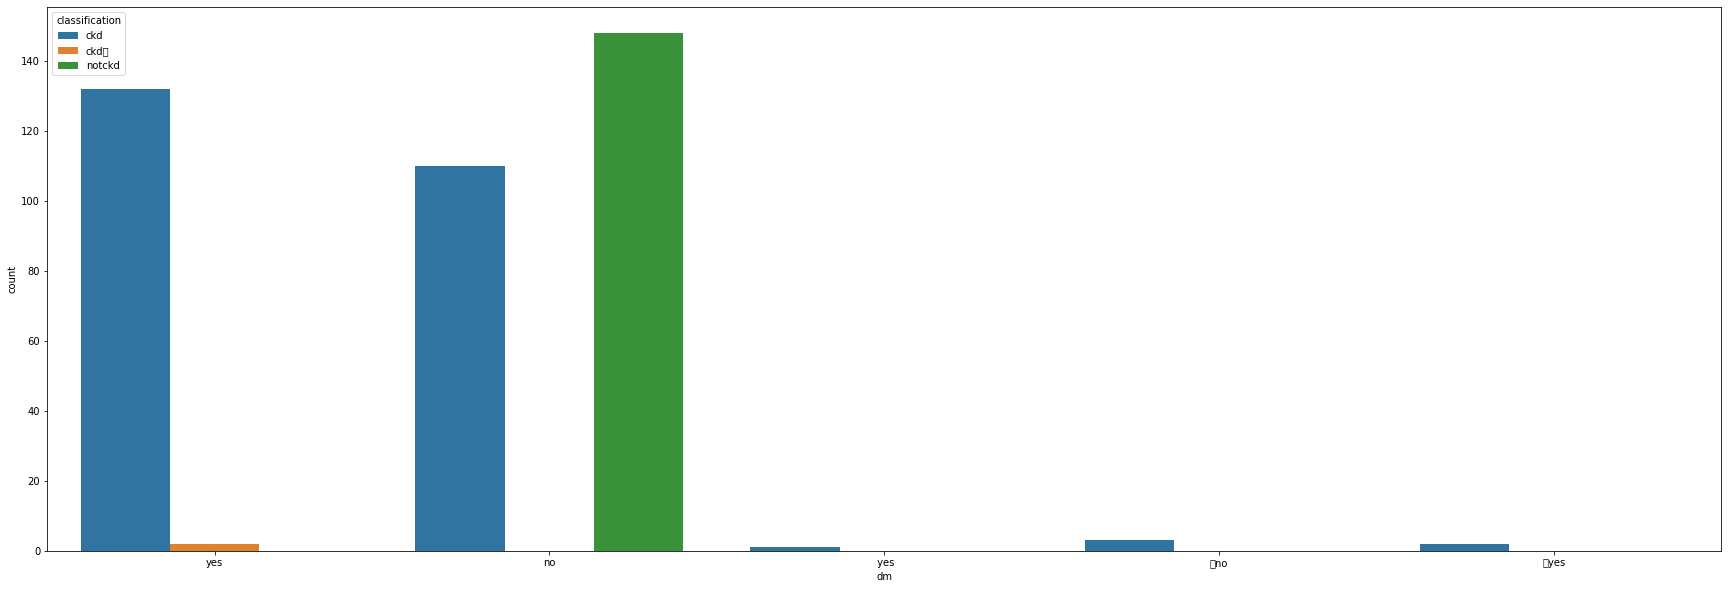

In [1140]:
plt.figure(figsize=(30,10))
sns.countplot('dm',hue='classification',data=kidni_data)
plt.show()

In [1141]:
kidni_data['dm']=kidni_data['dm'].fillna("no")

# there is some noice , we need to replace it with some valuable data

In [1142]:
kidni_data['dm'].replace({"\tno":"no","\tyes":"yes"," yes":"yes"}, inplace=True)

In [1143]:
level_encoding('dm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


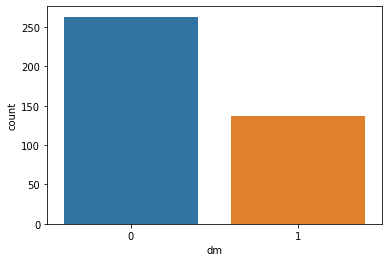

<Figure size 432x288 with 0 Axes>

In [1144]:
sns.countplot(kidni_data['dm'], );
fig = plt.figure()

# 'cad'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


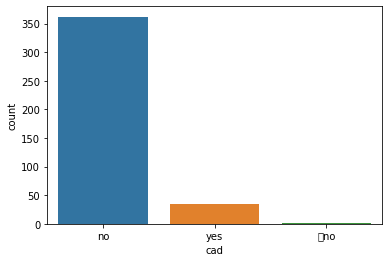

<Figure size 432x288 with 0 Axes>

In [1145]:

sns.countplot(kidni_data['cad']);
fig = plt.figure()

In [1146]:
kidni_data['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


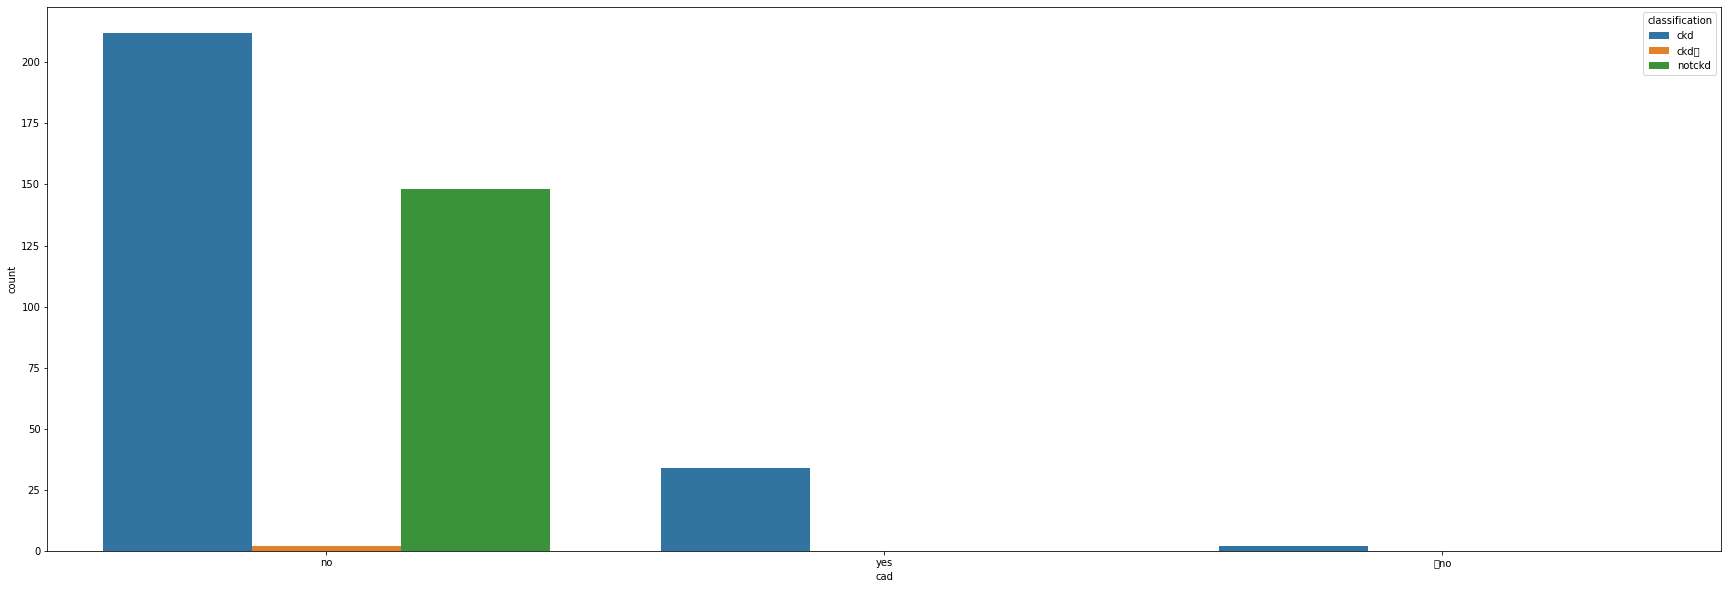

In [1147]:
plt.figure(figsize=(30,10))
sns.countplot('cad',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with "no" as it is maximum arise.

In [1148]:
kidni_data['cad']=kidni_data['cad'].fillna("no")

In [1149]:
kidni_data['cad'].replace({"\tno":"no"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


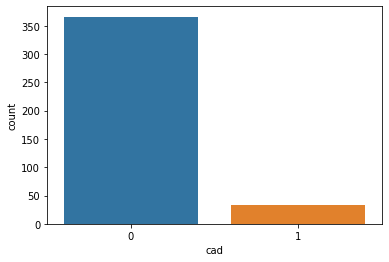

In [1150]:
level_encoding('cad')
sns.countplot(kidni_data['cad']);

# appet'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


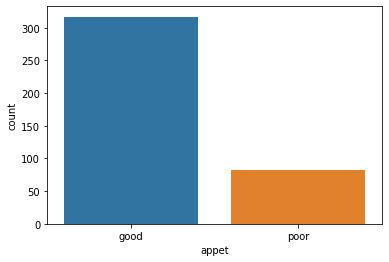

<Figure size 432x288 with 0 Axes>

In [1151]:
from scipy.stats import norm
sns.countplot(kidni_data['appet']);
fig = plt.figure()

In [1152]:
kidni_data['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


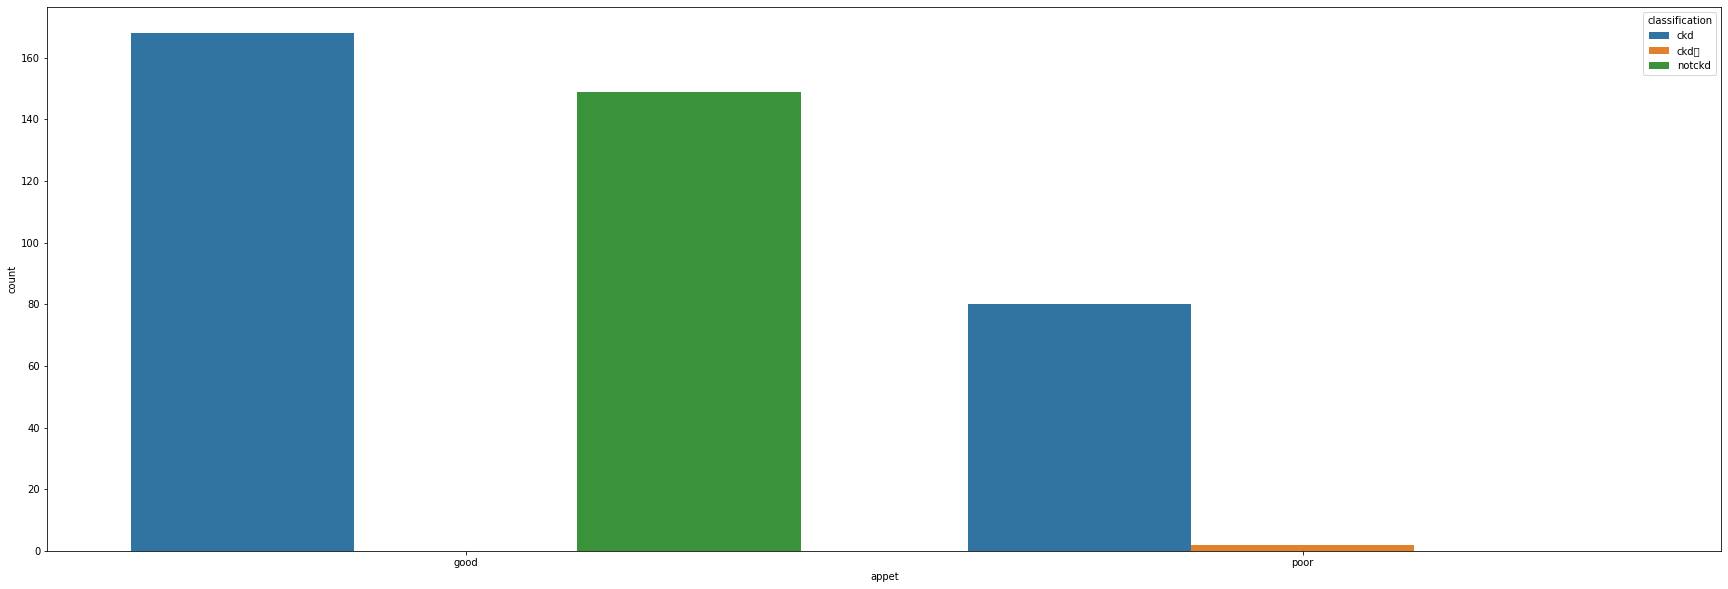

In [1153]:
plt.figure(figsize=(30,10))
sns.countplot('appet',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with good as it is maximum arise.

In [1154]:
kidni_data['appet']=kidni_data['appet'].fillna("good")

In [1155]:
level_encoding('appet')

# 'pe'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


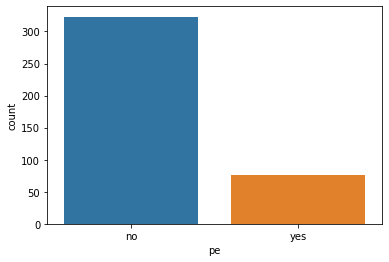

<Figure size 432x288 with 0 Axes>

In [1156]:

sns.countplot(kidni_data['pe']);
fig = plt.figure()

In [1157]:
kidni_data['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


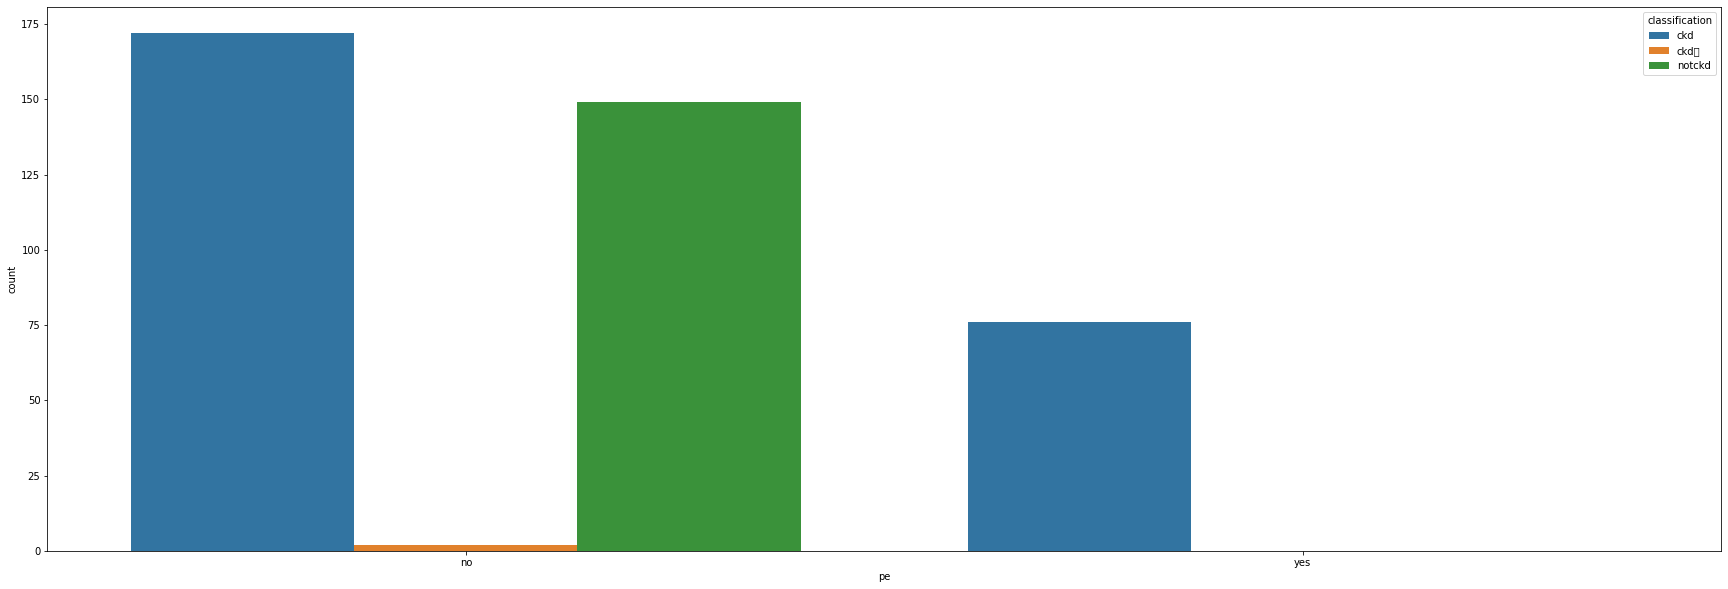

In [1158]:
plt.figure(figsize=(30,10))
sns.countplot('pe',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with no as it is maximum arise.

In [1159]:
kidni_data['pe']=kidni_data['pe'].fillna("no")

In [1160]:
level_encoding('pe')

# 'ane'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


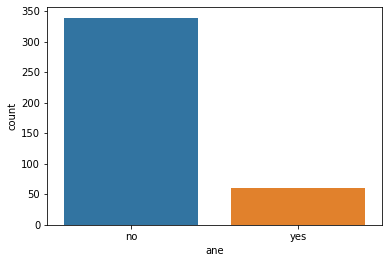

<Figure size 432x288 with 0 Axes>

In [1161]:

sns.countplot(kidni_data['ane']);
fig = plt.figure()

In [1162]:
kidni_data['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


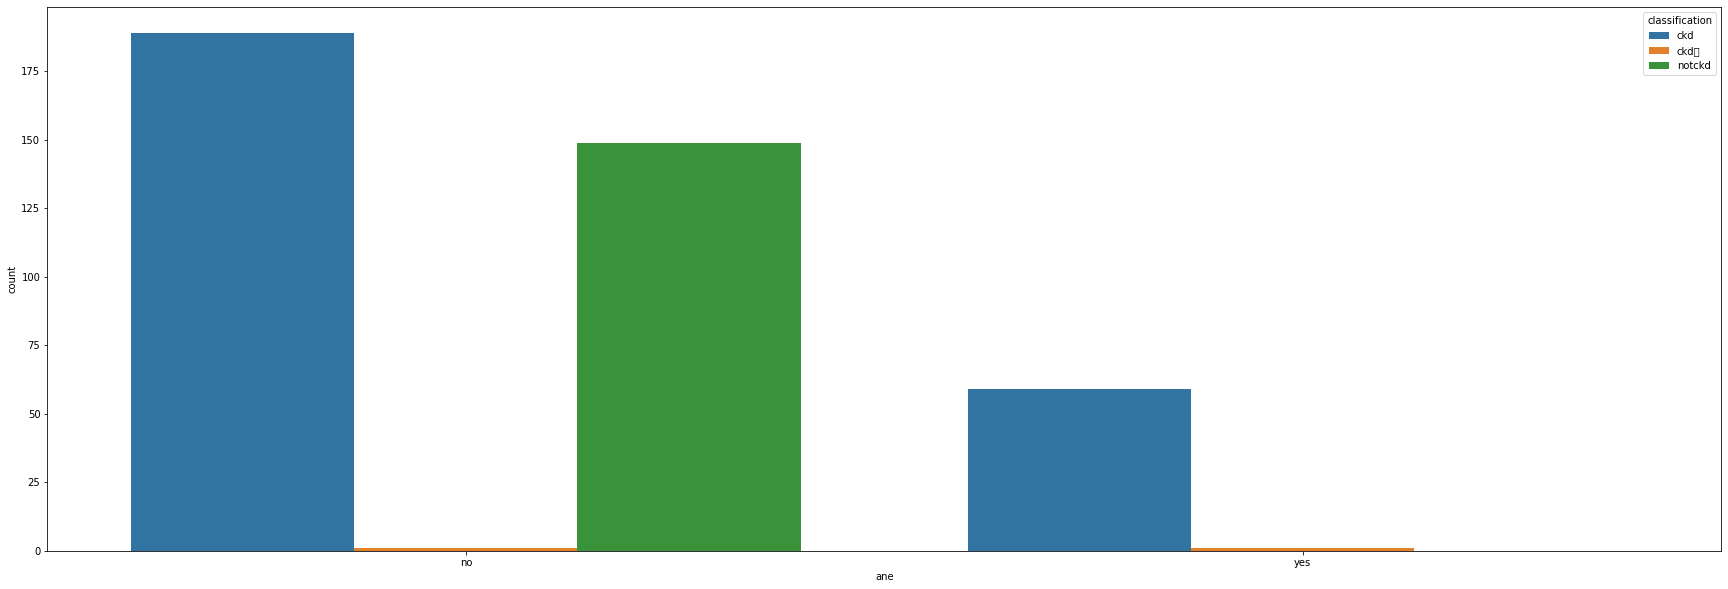

In [1163]:
plt.figure(figsize=(30,10))
sns.countplot('ane',hue='classification',data=kidni_data)
plt.show()

Filling the missing data with "no" as it is maximum arise.

In [1164]:
kidni_data['ane']=kidni_data['ane'].fillna("no")

In [1165]:
level_encoding('ane')

# 'classification'
       

In [1166]:
kidni_data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [1167]:
kidni_data['classification'].value_counts().index

Index(['ckd', 'notckd', 'ckd\t'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


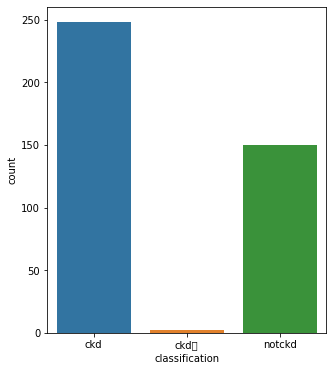

In [1168]:
plt.figure(figsize=(5,6))
sns.countplot('classification',data=kidni_data)
plt.show()

In [1169]:
kidni_data['classification'].replace({'ckd\t':"ckd"}, inplace=True)

In [1170]:
level_encoding('classification')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


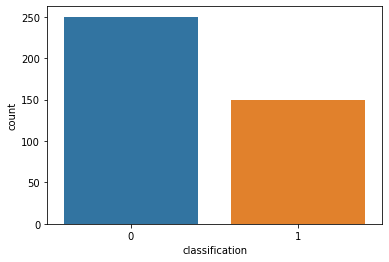

In [1190]:
sns.countplot('classification',data=kidni_data)

# data visulization after pre-processing

In [1175]:
kidni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

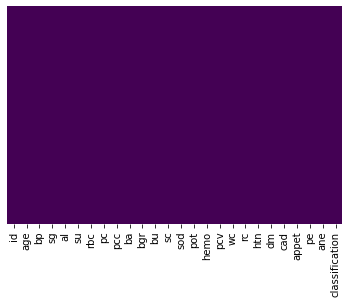

In [1176]:
sns.heatmap(kidni_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

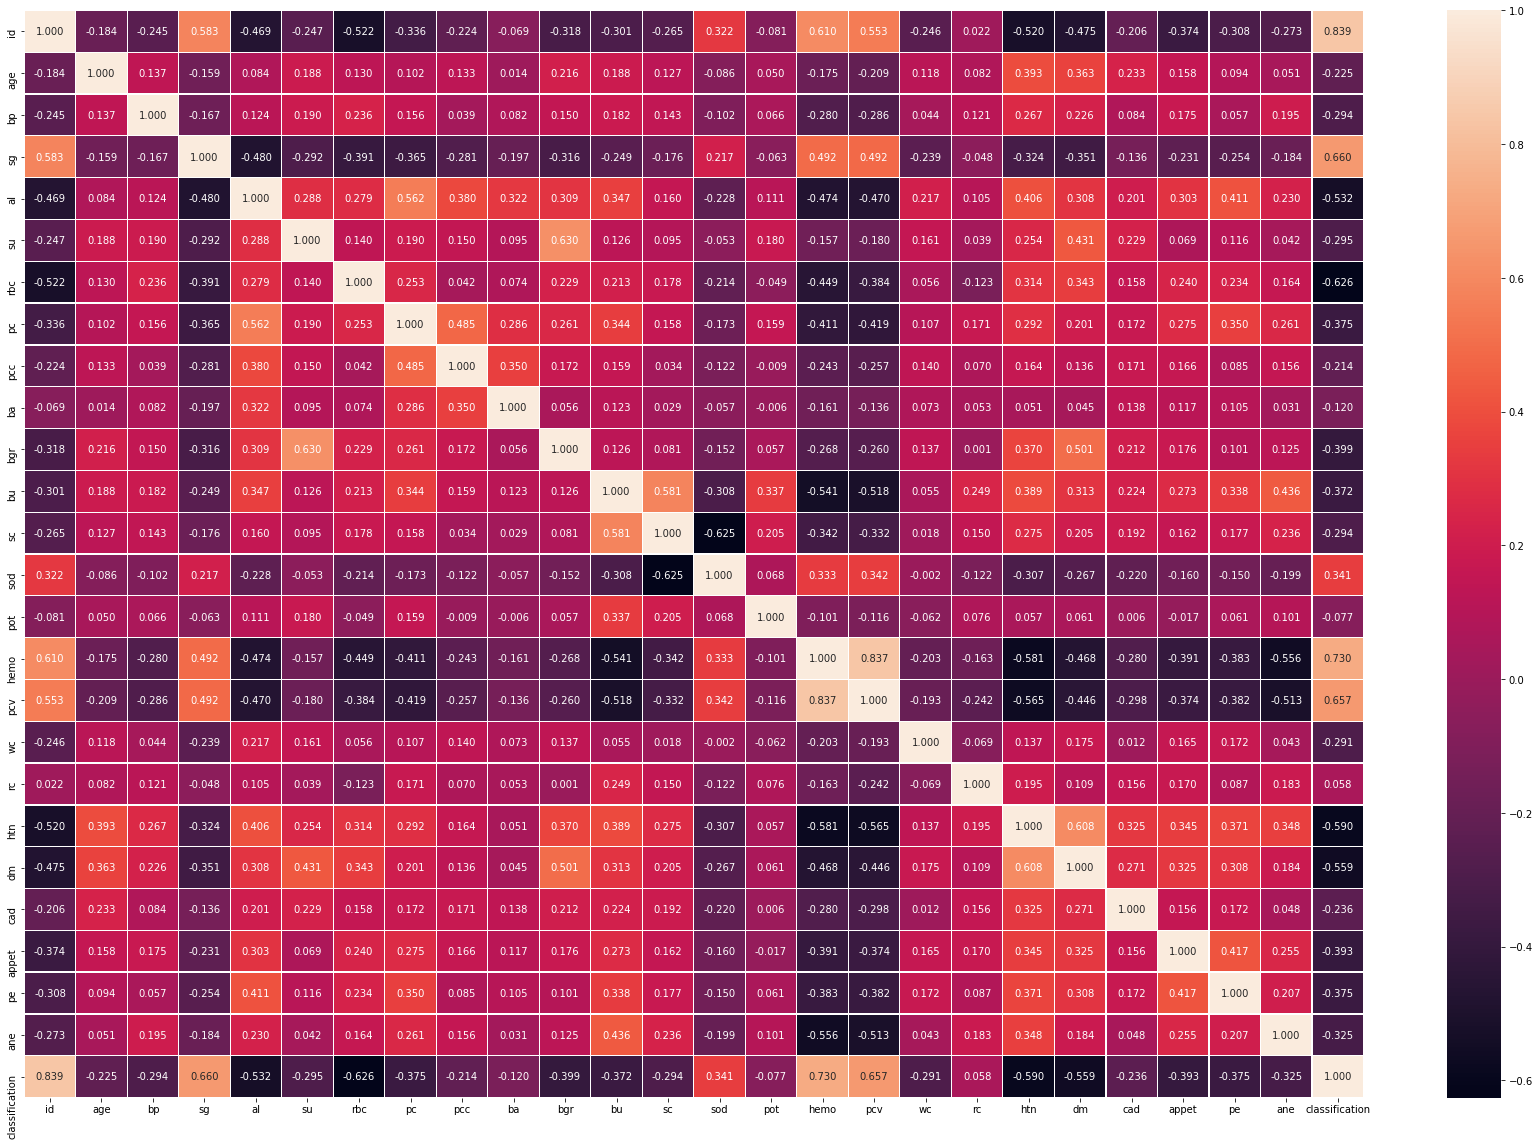

In [1177]:
import matplotlib.pyplot as plt


plt.figure(figsize=(30,20))
sns.heatmap(kidni_data.corr(), annot=True, linewidths=0.3, fmt= '.3f')

In [1178]:
"""import seaborn as sns
sns.pairplot(kidni_data,hue="classification")"""

'import seaborn as sns\nsns.pairplot(kidni_data,hue="classification")'

# removing the coloum which has very low correlation value with target feature

In [1179]:
kidni_data.drop(columns=['rbc','htn','al','dm'])

,id,age,bp,sg,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,0.0,0,0,0,121.00,36.0,1.2,137.58,4.62,15.4,44,7800,1,0,0,0,0,0
1,1,7.0,50.0,1.020,0.0,0,0,0,145.06,18.0,0.8,137.58,4.62,11.3,38,6000,0,0,0,0,0,0
2,2,62.0,80.0,1.010,3.0,0,0,0,423.00,53.0,1.8,137.58,4.62,9.6,31,7500,0,0,1,0,1,0
3,3,48.0,70.0,1.005,0.0,1,1,0,117.00,56.0,3.8,111.00,2.50,11.2,32,6700,6,0,1,1,1,0
4,4,51.0,80.0,1.010,0.0,0,0,0,106.00,26.0,1.4,137.58,4.62,11.6,35,7300,7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0,0,0,140.00,49.0,0.5,150.00,4.90,15.7,47,6700,3,0,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0,0,0,75.00,31.0,1.2,141.00,3.50,16.5,54,7800,23,0,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0,0,0,100.00,26.0,0.6,137.00,4.40,15.8,49,6600,16,0,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0,0,0,114.00,50.0,1.0,135.00,4.90,14.2,51,7200,9,0,0,0,0,1


# CREATE MODEL

The first task will be to **split the dataset** into train set and test set.

In [1180]:
X_train = kidni_data.drop("classification", axis=1)
Y_train = kidni_data["classification"]

In [1181]:
from sklearn.model_selection import train_test_split

# splitting data in training set(70%) and test set(30%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

## Decision Tree Classifier

In [1182]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt=dt.fit(x_train, y_train)

In [1183]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,dt.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,dt.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,dt.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


## 100% train Accuracy

In [1184]:
y_pred = dt.predict(x_test)
np.set_printoptions(precision=2)
from itertools import chain
y_test=y_test.tolist()
for i in range(100):
    print("Actual : ", y_test[i], "; Predicted: ", y_pred[i])

Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predic

In [1185]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,dt.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,dt.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,dt.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0


# 99.16% testing accuracy

## Random Forest Classifier

In [1186]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
rf = rf.fit(x_train,y_train)

In [1187]:
act = accuracy_score(y_train,rf.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,rf.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,rf.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,rf.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


## 100% train Accuracy

In [1188]:
y_pred = rf.predict(x_test)
np.set_printoptions(precision=2)
from itertools import chain
#y_test=y_test.tolist()
for i in range(100):
    print("Actual : ", y_test[i], "; Predicted: ", y_pred[i])

Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predic

In [1189]:
act = accuracy_score(y_test,rf.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,rf.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,rf.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,rf.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0


# both model has Giving 100%  train accuracy. but in case of testing accurecy , decision tree is giving 99.16% and 100% testing accuracy for Random Forest